# House Prices

Project ownership : Vincent Boettcher's notebook.

Goal : Predict the sales price for each house in Ames, Iowa. For each Id in the test set, you must predict the value of the SalePrice variable.

Metric : Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Dataframe details

This dataframe uses US metrics such as square feet.

After much consideration, these metrics will be kept as is because this is a data analysis based on data of the US market and more precisely of the town of Ames in Iowa. It felt more logical to keep the original metric.

But 1 : if it helps, here is how you can translate this data:
1 square meter = 0.09290304 square feet

But 2 : this decision has nothing to do with the fact that I'm lazy.

## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn Imports
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector


## Data analysis

### Size, shape, quantity and type of data

In [3]:
# Importing training data
dataset_origin = pd.read_csv("Data/train.csv")
dataset_origin.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
# Copying the original dataframe to keep a copy untouched
dataset = dataset_origin.copy()


In [5]:
# Looking at the shape of the dataframe
print(f"Shape of the dataframe: \n {dataset.shape}\n")
print(f"Column names: \n {dataset.columns}\n")


Shape of the dataframe: 
 (1460, 81)

Column names: 
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'Garag

In [6]:
dataset.set_index("Id", inplace=True)


In [7]:
print(f"Column names, Non-Null Count and type of data: \n {dataset.info()}")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Total of columns : 81
Total of rows : 1460
Total of data types : float64(3), int64(35), object(43)
Data quantity : more or less 115k

The dataframe seems to contain a lot of extremely detailed categories regarding various types of properties and amenities.

We will have to find which may have an impact on the sale prices of houses.

### Dealing with missing values

Before going any further, we will check if there are missing values in this dataframe and we will deal with these missing values.

Now let's have a look at an example of column with null values.

In [8]:
dataset["Alley"]


Id
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
       ... 
1456    NaN
1457    NaN
1458    NaN
1459    NaN
1460    NaN
Name: Alley, Length: 1460, dtype: object

Some columns seem to have null data. But when we look at the data description file given with the dataset, it seems that some data with the entry "NA" have been transformed to "NaN" in the dataframe. 

For example, in the data description file, the column "Alley" should have the following data : "NA" for "No alley access". Instead it was replaced by "NaN" for null.

We will have a look at these columns to make the appropriate modifications.

In [9]:
dataset_nan_values = [
    "Alley",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "FireplaceQu",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "Fence",
    "MiscFeature",
]

for columns in dataset_nan_values:
    dataset[columns].fillna("NA", inplace=True)

print(f"Non-Null Count Verification: \n {dataset.info()}")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
dataset.loc[:, dataset.isnull().any()]


,LotFrontage,MasVnrType,MasVnrArea,Electrical,GarageYrBlt
Id,,,,,
1,65.0,BrkFace,196.0,SBrkr,2003.0
2,80.0,None,0.0,SBrkr,1976.0
3,68.0,BrkFace,162.0,SBrkr,2001.0
4,60.0,None,0.0,SBrkr,1998.0
5,84.0,BrkFace,350.0,SBrkr,2000.0
...,...,...,...,...,...
1456,62.0,None,0.0,SBrkr,1999.0
1457,85.0,Stone,119.0,SBrkr,1978.0
1458,66.0,None,0.0,SBrkr,1941.0


"NaN" values have been replaced with "NA" when it was relevant - using the data description file given at the start of the project.

We now have the following columns with some null values :

LotFrontage, MasVnrType, MasVnrArea, Electrical, GarageYrBlt

In [11]:
dataset.loc[dataset["LotFrontage"].isnull(), :]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
8,60,RL,NaN,10382,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
13,20,RL,NaN,12968,Pave,NA,IR2,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,144000
15,20,RL,NaN,10920,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,GdWo,NA,0,5,2008,WD,Normal,157000
17,20,RL,NaN,11241,Pave,NA,IR1,Lvl,AllPub,CulDSac,...,0,NA,NA,Shed,700,3,2010,WD,Normal,149000
25,20,RL,NaN,8246,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,MnPrv,NA,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,20,RL,NaN,12546,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,4,2007,WD,Normal,182900
1432,120,RL,NaN,4928,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,10,2009,WD,Normal,143750
1442,120,RM,NaN,4426,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2008,WD,Normal,149300


We will replace missing values in the column "LotFrontage" with most frequent data.

In [12]:
# Replacing "NaN" values in LotFrontage column with most frequent data
dataset["LotFrontage"] = dataset["LotFrontage"].fillna(
    dataset["LotFrontage"].value_counts().index[0]
)

# Verification
dataset.loc[dataset["LotFrontage"].isnull(), :]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [13]:
dataset.loc[dataset["MasVnrType"].isnull(), :]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
235,60,RL,60.0,7851,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2010,WD,Normal,216500
530,20,RL,60.0,32668,Pave,NA,IR1,Lvl,AllPub,CulDSac,...,0,NA,NA,NA,0,3,2007,WD,Alloca,200624
651,60,FV,65.0,8125,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2008,WD,Normal,205950
937,20,RL,67.0,10083,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2009,WD,Normal,184900
974,20,FV,95.0,11639,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,12,2008,New,Partial,182000
978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,11,2007,New,Partial,199900
1244,20,RL,107.0,13891,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2006,New,Partial,465000
1279,60,RL,75.0,9473,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,3,2008,WD,Normal,237000


We will now replace missing values in the column "MasVnrType" with most frequent data.

In [14]:
# Replacing "NaN" values in MasVnrType column with most frequent data
dataset["MasVnrType"] = dataset["MasVnrType"].fillna(
    dataset["MasVnrType"].value_counts().index[0]
)

# Verification
dataset.loc[dataset["MasVnrType"].isnull(), :]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [15]:
dataset.loc[dataset["MasVnrArea"].isnull(), :]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
235,60,RL,60.0,7851,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2010,WD,Normal,216500
530,20,RL,60.0,32668,Pave,NA,IR1,Lvl,AllPub,CulDSac,...,0,NA,NA,NA,0,3,2007,WD,Alloca,200624
651,60,FV,65.0,8125,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2008,WD,Normal,205950
937,20,RL,67.0,10083,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2009,WD,Normal,184900
974,20,FV,95.0,11639,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,12,2008,New,Partial,182000
978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,11,2007,New,Partial,199900
1244,20,RL,107.0,13891,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2006,New,Partial,465000
1279,60,RL,75.0,9473,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,3,2008,WD,Normal,237000


We will now replace missing values in the column "MasVnrArea" with most frequent data.

In [16]:
# Replacing "NaN" values in MasVnrArea column with most frequent data
dataset["MasVnrArea"] = dataset["MasVnrArea"].fillna(
    dataset["MasVnrArea"].value_counts().index[0]
)

# Verification
dataset.loc[dataset["MasVnrArea"].isnull(), :]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [17]:
dataset.loc[dataset["Electrical"].isnull(), :]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1380,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2008,WD,Normal,167500


The column "Electrical" as only one missing data, so once again we will replace its value with the most frequent value.

In [18]:
# Replacing "NaN" values in Electrical column with most frequent data
dataset["Electrical"].fillna(dataset["Electrical"].mode()[0], inplace=True)

# Verification
dataset.loc[dataset["Electrical"].isnull(), :]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [19]:
dataset.loc[dataset["GarageYrBlt"].isnull(), :]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,6,2008,WD,AdjLand,82000
49,190,RM,33.0,4456,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,6,2009,New,Partial,113000
79,90,RL,72.0,10778,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2010,WD,Normal,136500
89,50,C (all),105.0,8470,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,MnPrv,NA,0,10,2009,ConLD,Abnorml,85000
90,20,RL,60.0,8070,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,12,2008,WD,Normal,122000
1408,20,RL,60.0,8780,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,MnPrv,NA,0,3,2009,WD,Normal,112000
1450,180,RM,21.0,1533,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2006,WD,Abnorml,92000


The missing values in this column mean here that the house does not have a garage and thus the garage has no year to add to this column since it was simply not built.

One option could be to remove the rows with the missing data but it seems a bit extreme to remove 81 rows just because they have no garage and logically no year in which the garage was built.

The other option that I'm going to pursue instead is to replace the missing values with the values contained in the column "YearBuilt" which correspond to the year in which the house was built. Logically, if a garage was built with these houses, it would have probably been built around the same time as the house.

So let's do that, shall we?

In [20]:
# Replacing "NaN" values in "GarageYrBlt" column with "YearBuilt" data
dataset["GarageYrBlt"].fillna(dataset["YearBuilt"], inplace=True)

# Verification
dataset.loc[dataset["GarageYrBlt"].isnull(), :]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


Now that null values have been delt with, let's move on to something more colorful.

### What is in the column Sale Prices?

Let's have a look at the content of the column "SalePrice" to see how sale prices are distributed in our dataframe.

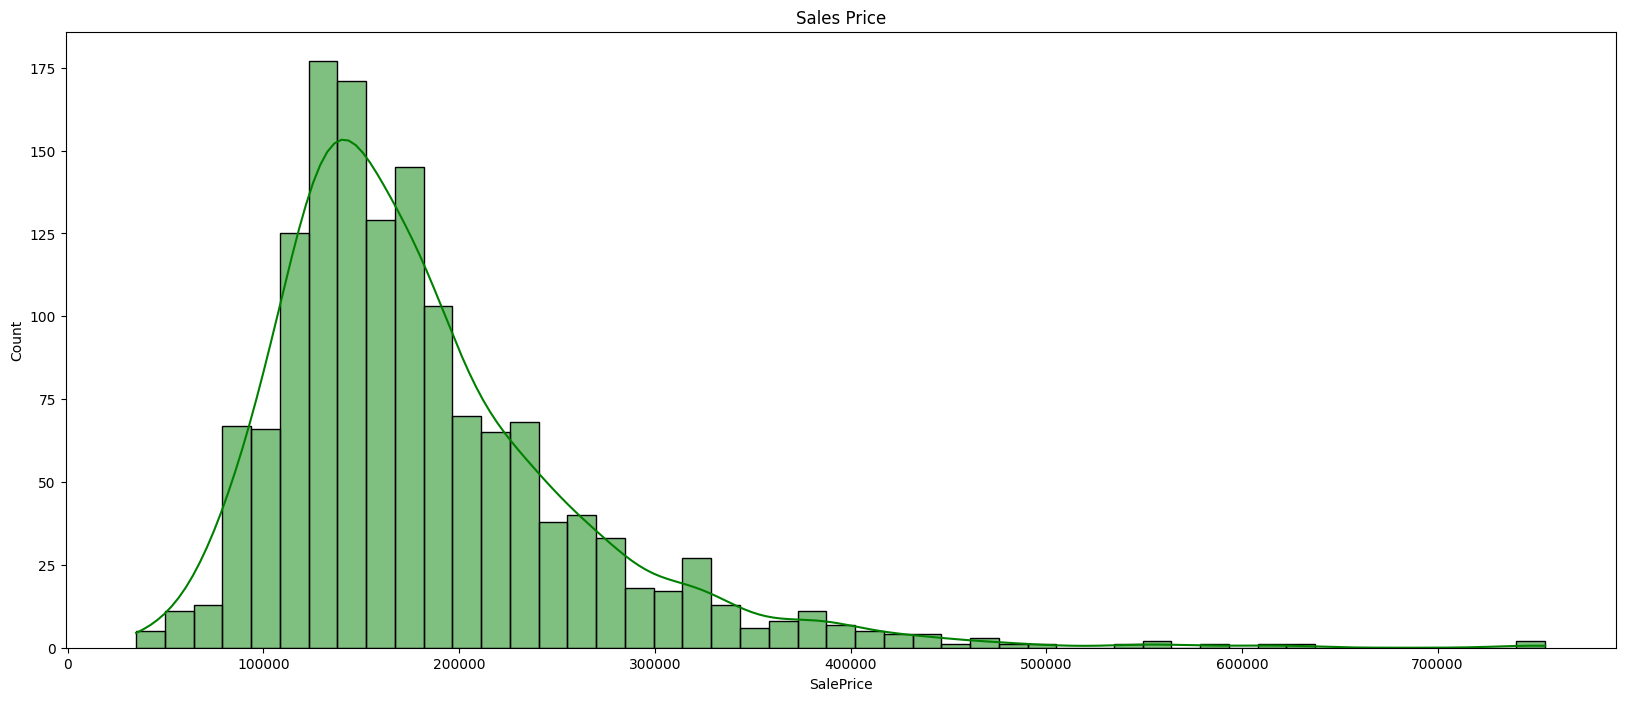

In [21]:
plt.figure(figsize=(20, 8))
plt.title("Sales Price")
plt.show(sns.histplot(dataset["SalePrice"], legend=True, color="green", kde=True))


The distribution is uneven. Most data is for houses sold between $100000 and $200000.

### Correlation matrix between columns with numerical values

Now, let's start building a correlation matrix to have a look at which data might have an impact on the sales price.

First, we will store the correlation data into a separate dataset and then we will filter to keep only potentially relevant correlations. Otherwise it would simply be unreadable due to the massive amount of data at our disposal.

In [22]:
dataset_corr = dataset.corr()
dataset_corr_filtered = dataset_corr[
    ((dataset_corr >= 0.2) | (dataset_corr <= -0.2)) & (dataset_corr != 1.000)
]
dataset_corr_filtered.head()


/var/folders/16/l4xgjhw90qsftr1ws3c4f9zh0000gn/T/ipykernel_20109/2060387802.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_corr = dataset.corr()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,NaN,-0.349116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,-0.349116,NaN,0.281283,0.236891,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.329220
LotArea,NaN,0.281283,NaN,NaN,NaN,NaN,NaN,NaN,0.214103,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.263843
OverallQual,NaN,0.236891,NaN,NaN,NaN,0.572323,0.550684,0.407252,0.239666,NaN,...,0.238923,0.308819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,NaN,-0.375983,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### How does it work?

The values are between -1 and +1.

A positive correlation is observed when the values of the two variables being compared increase together.

And a negative correlation when the values of one variable increase while the values of the other variable decrease.

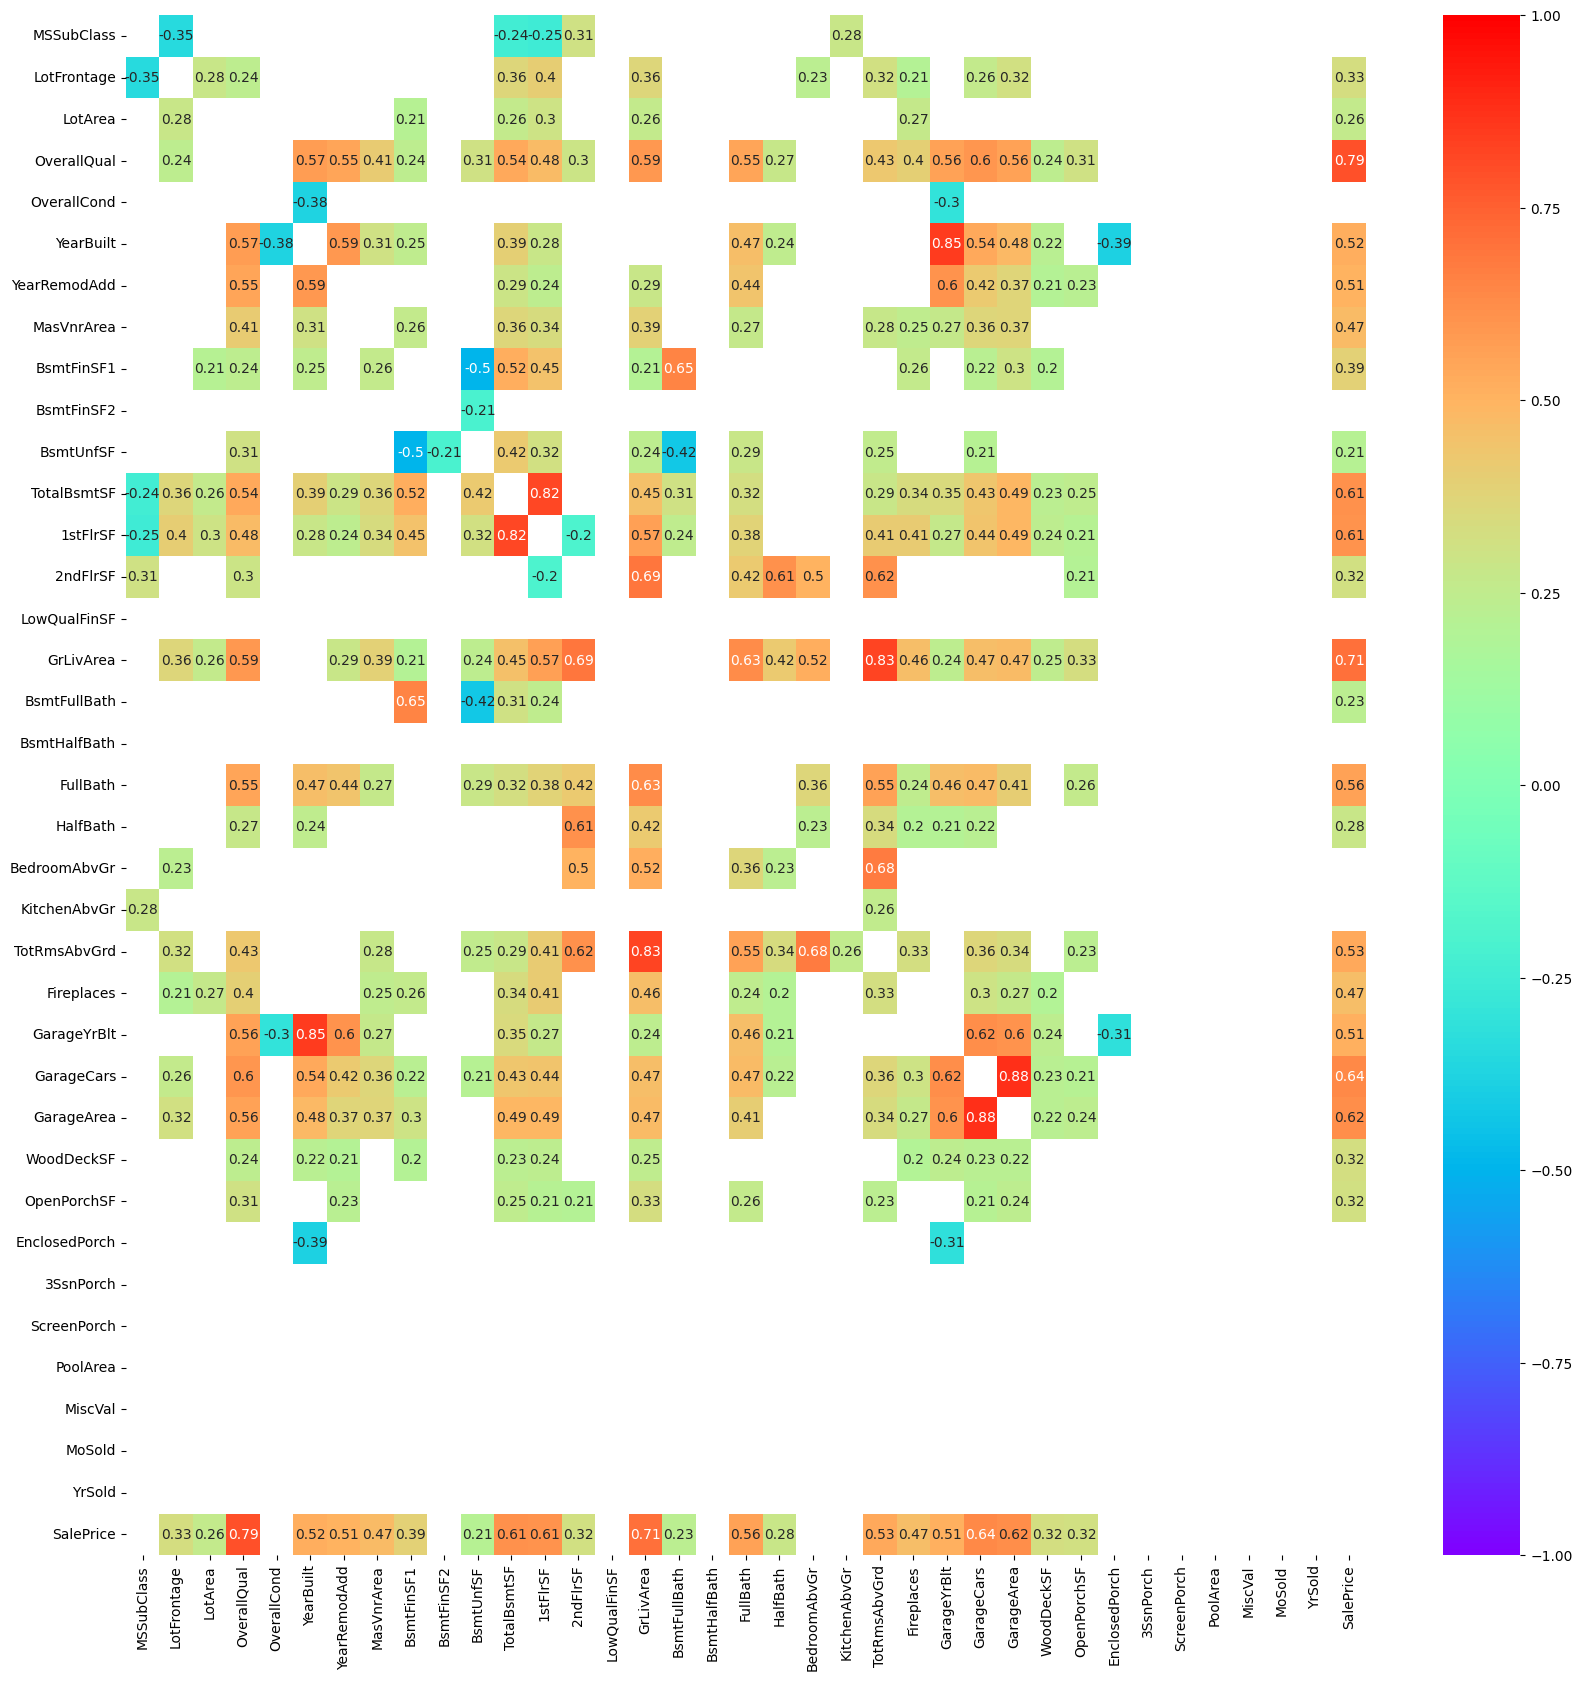

In [23]:
plt.figure(figsize=(20, 20))
plt.show(
    sns.heatmap(dataset_corr_filtered, vmin=-1, vmax=+1, annot=True, cmap="rainbow")
)


At first glance, some values seem to have a high correlation with the sale price of a house:
- OverallQual has a 0.79 correlation with SalePrice
- GrLivArea has a 0.71 correlation with SalePrice
- GarageCars has a 0.64 correlation with SalePrice

And so on.

Also, some seem to have almost no impact on the price of a house : all those values where skipped because we requested for our correlations to be superior to 0.20 or inferior to -0.20. So all the columns that were not included in the correlation matrix could be considered to have a limited or no positive or negative impact on the price of a house.

### Correlation heatmap

We will have a look at a correlation heatmap linked to the "SalePrice" column in order to look at which column might have a positive or negative correlation on the price of a house.

In [24]:
dataset_corr_saleprice = dataset.corr()[["SalePrice"]]
dataset_corr_saleprice.head(15)


/var/folders/16/l4xgjhw90qsftr1ws3c4f9zh0000gn/T/ipykernel_20109/3851340981.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_corr_saleprice = dataset.corr()[["SalePrice"]]


,SalePrice
MSSubClass,-0.084284
LotFrontage,0.329220
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.472614
BsmtFinSF1,0.386420
BsmtFinSF2,-0.011378


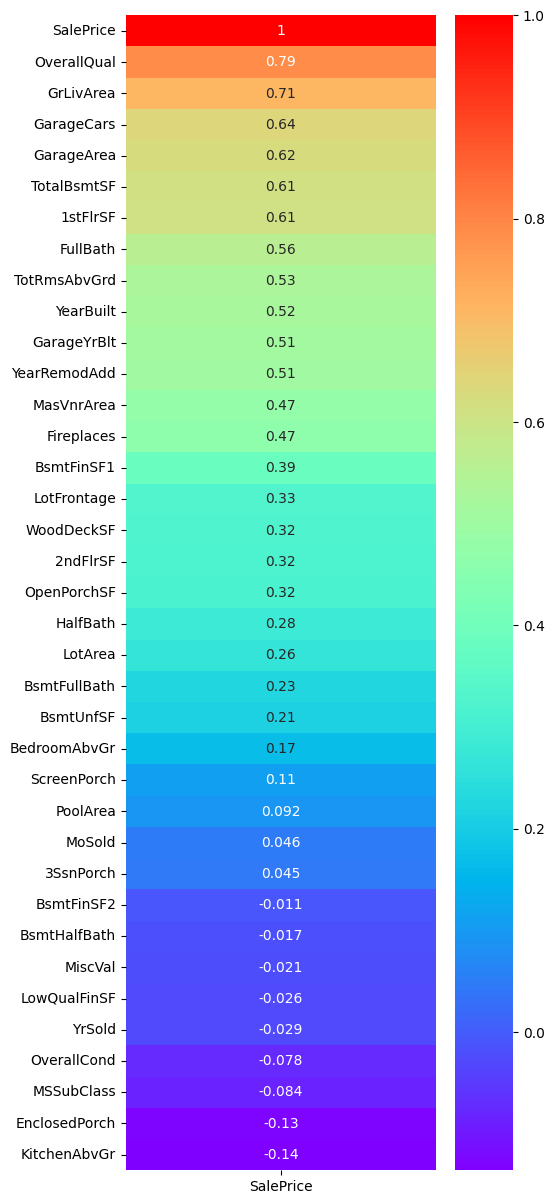

In [25]:
plt.figure(figsize=(5, 15))
plt.show(
    sns.heatmap(
        dataset_corr_saleprice.sort_values(by=["SalePrice"], ascending=False),
        cmap="rainbow",
        annot=True,
    )
)


The values are similar between the correlation matrix and the heatmap which is logical.

We can consider the columns above 0.40 to have an impact on the sales price of a house. These columns are :
- OverallQal for the overall quality of the house
- GrLivArea for the above ground living area measured in square feet
- GarageCars for the size of the garage measured in car capacity
- GarageArea for the size of the garage measured in square feet
- FullBath for the number of bathrooms above ground
- TotalBsmtSF for the total square feet of the basement area
- 1stFlrSF for the size of the first floor measured in square feet
- TotRmsAbvGrd for the total number of rooms above ground (excluding bathrooms)
- YearBuilt for the year in which the house was built
- YearRemodAdd for remodel date
- MasVnrArea for the masonry veneer area in square feet
- Fireplaces for the number of fireplaces in the house

We could also consider columns below -0.40 to have an impact on the sales price of a house. However, none score below -0.40.

A few notes:
- GarageCars and GarageArea are pretty similar, they represent the size of the garage but are simply measured differently : one is measured with square feet, the other is measured with the number of cars that could fit in the garage.
- Most of these represent sizes in square feet which could mean that the size does count ! - already facepalming myself.
- All of the columns used have numerical data, categorical data was not included in these correlations.

#### Transforming categorical data

Now, to be a bit more thorough, we will transform categorical data in order to add them to our correlation matrix and correlation heatmap. Otherwise, we could be missing out on values that actually have an impact on the sales price.

In [26]:
# Setting the encoder to OrdinalEncoder
encoder = OrdinalEncoder(dtype=np.int64)

# Selecting categorical columns
categorical_features = make_column_selector(dtype_exclude=np.number)

# New dataframe built upon a copy of the previous dataframe
dataset_encoded = dataset.copy()

# Transforming categorical data with the encoder, i.e. encoding data.
dataset_encoded.loc[:, categorical_features] = encoder.fit_transform(
    dataset_encoded.loc[:, categorical_features]
)

# Getting only the correlation data into the dataframe
dataset_corr_encoded = dataset_encoded.corr()

# Putting filtered data into a new dataframe to keep only the ones higher than 0.20 and lower than -0.20
dataset_corr_encoded_filtered = dataset_corr_encoded[
    ((dataset_corr_encoded >= 0.2) | (dataset_corr_encoded <= -0.2))
    & (dataset_corr_encoded != 1.000)
]

# Checking if the dataframe works and contains only correlation values above the requested numbers
dataset_corr_encoded_filtered.head(10)


/var/folders/16/l4xgjhw90qsftr1ws3c4f9zh0000gn/T/ipykernel_20109/3233580481.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset_encoded.loc[:, categorical_features] = encoder.fit_transform(


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,NaN,NaN,-0.349116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSZoning,NaN,NaN,NaN,NaN,NaN,-0.368086,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,-0.349116,NaN,NaN,0.281283,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.329220
LotArea,NaN,NaN,0.281283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.263843
Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,NaN,-0.368086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.221102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.255580
LandContour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotConfig,NaN,NaN,NaN,NaN,NaN,NaN,0.221102,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Correlation matrix with numerical values and encoded categorical values

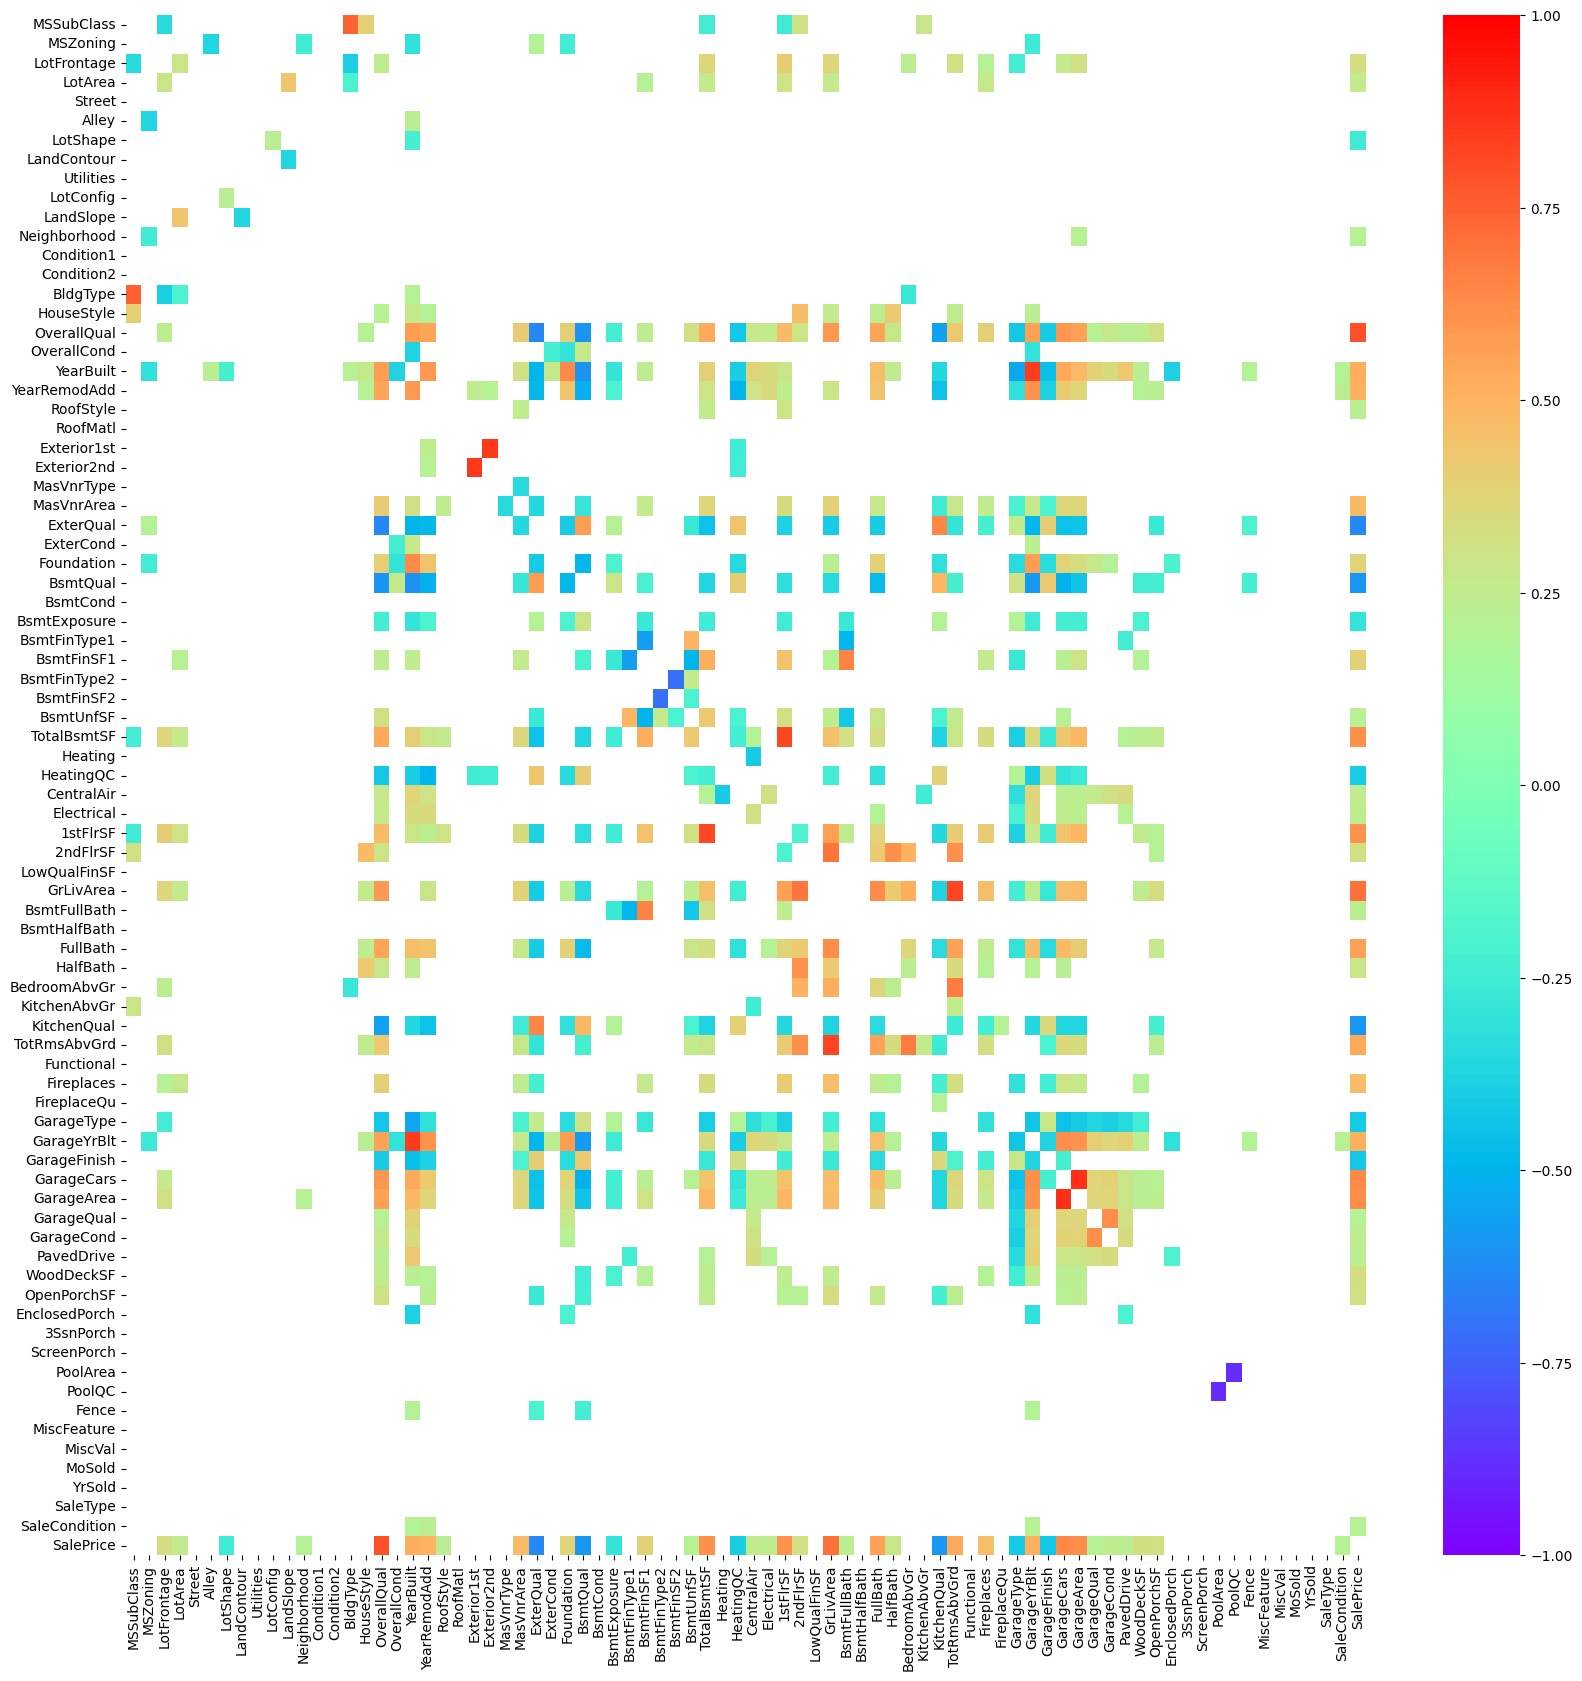

In [27]:
# Correlation matrix with filtered numerical and categorical data (after encoding)
plt.figure(figsize=(20, 20))
plt.show(
    sns.heatmap(
        dataset_corr_encoded_filtered, vmin=-1, vmax=+1, annot=False, cmap="rainbow"
    )
)


Due to the quantity of data still being shown in this correlation matrix, readability isn't optimal. I decided to remove the annotations that we previously shows.

So let's have a closer look at the columns which values are above to 0.40 or lower to -0.40.

In [28]:
"""Storing filtered data into a new dataframe to keep only the ones higher than 0.40 and lower than -0.40
in order to make the correlation matrix a bit more readable"""
dataset_corr_encoded_filtered_2 = dataset_corr_encoded[
    ((dataset_corr_encoded >= 0.4) | (dataset_corr_encoded <= -0.4))
    & (dataset_corr_encoded != 1.000)
]

# Checking if it is correct
dataset_corr_encoded_filtered_2.head(15)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSZoning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotConfig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


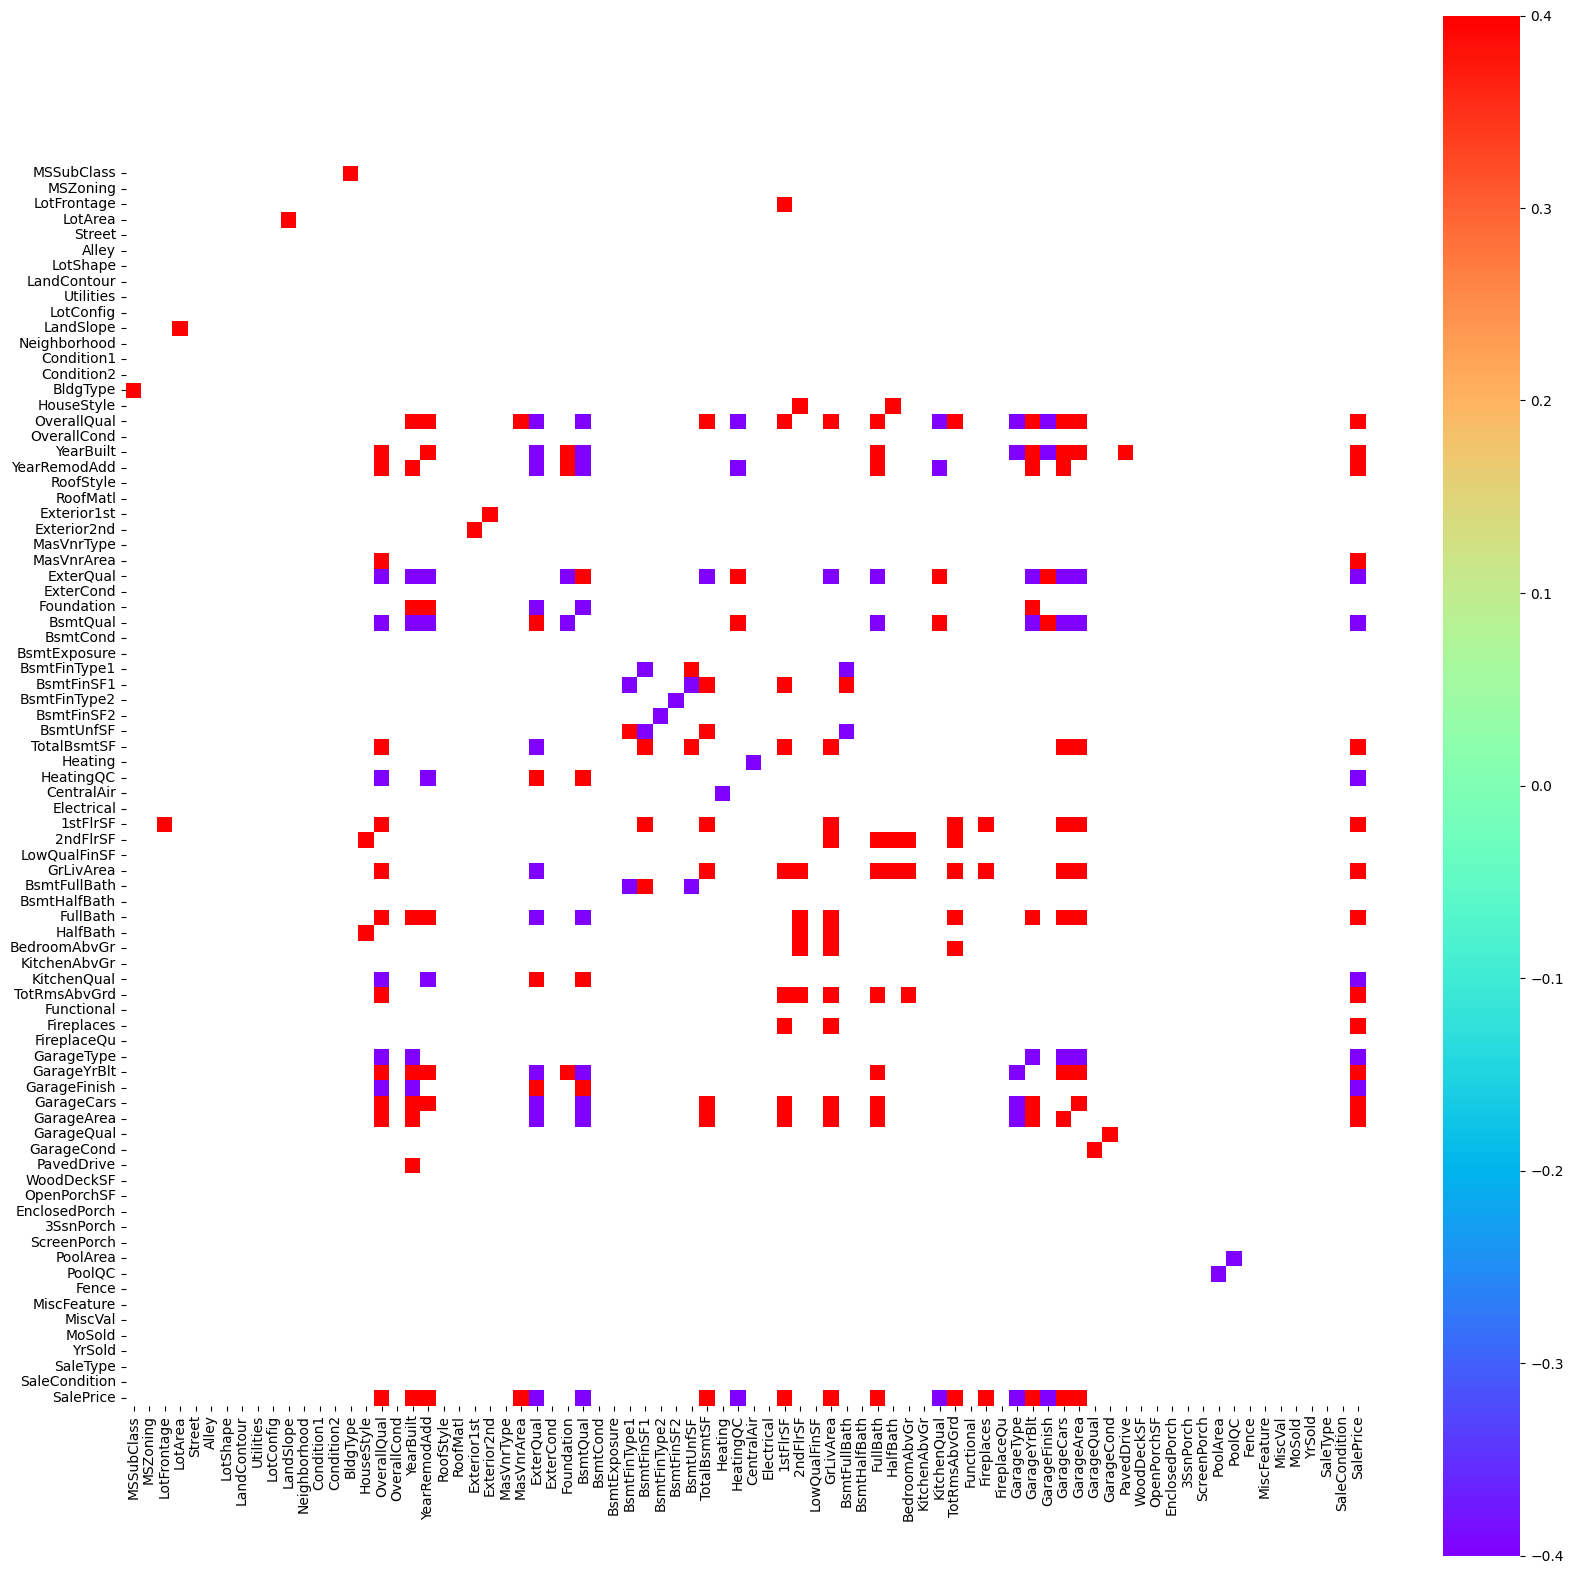

In [29]:
"""Correlation matrix with filtered numerical and categorical data (after encoding)
limited to 0.40 or above and -0.40 and below values in order to see two different groups 
(positive correlations and negative correlations)"""

plt.figure(figsize=(20, 20))
plt.show(
    sns.heatmap(
        dataset_corr_encoded_filtered_2,
        vmin=-0.4,
        vmax=0.4,
        annot=False,
        cmap="rainbow",
        square=True,
    )
)


Now, let's have a closer look at the correlation heatmap in order to have a better readability of these correlations.

### Correlation heatmap with numerical values and encoded categorical values

In [30]:
# Creating a dataframe with correlation values for the column "SalePrice"
dataset_corr_full_saleprice = dataset_encoded.corr()[["SalePrice"]]
dataset_corr_full_saleprice.head(15)


,SalePrice
MSSubClass,-0.084284
MSZoning,-0.166872
LotFrontage,0.329220
LotArea,0.263843
Street,0.041036
Alley,0.083121
LotShape,-0.255580
LandContour,0.015453
Utilities,-0.014314
LotConfig,-0.067396


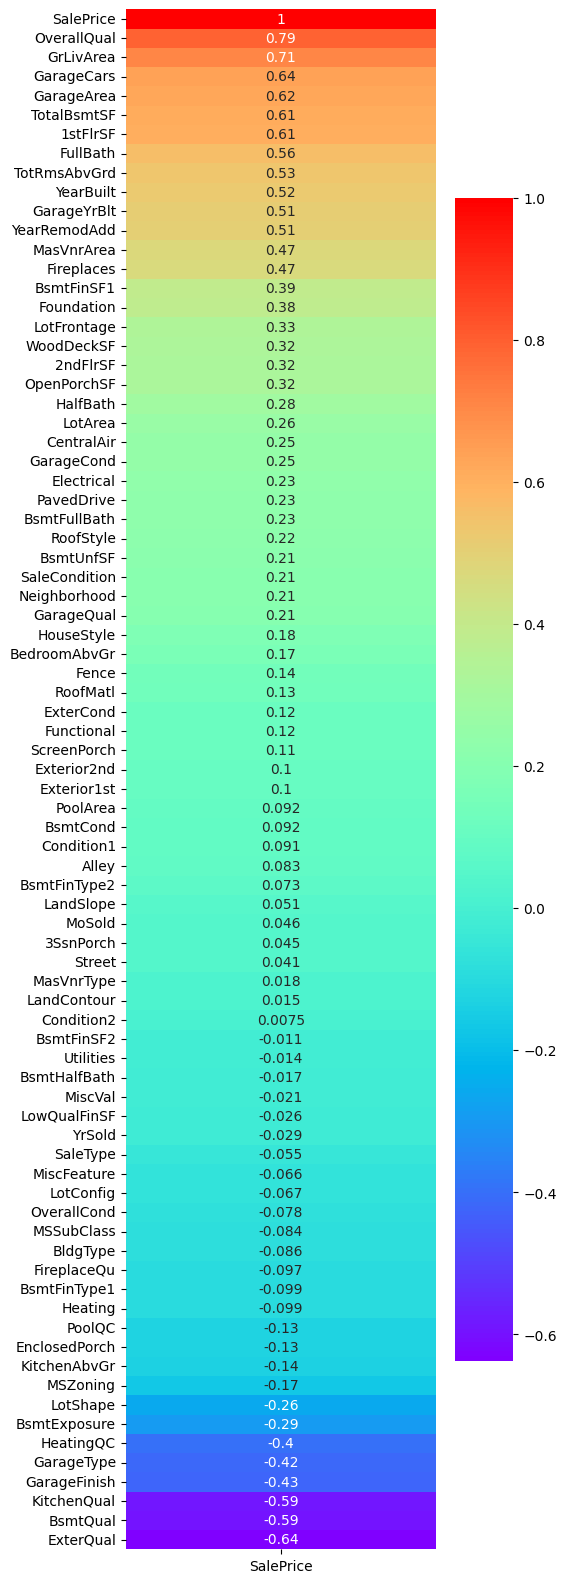

In [31]:
plt.figure(figsize=(5, 20))
plt.show(
    sns.heatmap(
        dataset_corr_full_saleprice.sort_values(by=["SalePrice"], ascending=False),
        cmap="rainbow",
        annot=True,
    )
)


A few notes :
- The above 0.40 ranking did not change.
- The below or equal to -0.40 ranking did change : some of our categorical data is shown as having a correlation on the sales price of the house.

The columns that are below or equal to -0.40 are, starting from the lowest of all :
- ExterQual for the quality of the material on the exterior of the house
- BsmtQual for the evaluation of the height of the basement
- KitchenQual for the evaluation of the kitchen quality
- GarageFinish for the quality of the interior finish of the garage
- GarageType for the type of the garage and its location compared to the house
- HeatingQC for the heating quality and condition

These columns seem to be linked to quality and the evaluation of quality for certain aspects of a house. I wonder if we could link these elements to the column "OverallQual" (for overall quality) which sits at the top of the correlation heatmap.

### Correlation with the overall quality of a house

In [32]:
dataset_corr_full_overallqual = dataset_encoded.corr()[["OverallQual"]]
dataset_corr_full_overallqual.head(15)


,OverallQual
MSSubClass,0.032628
MSZoning,-0.160099
LotFrontage,0.236891
LotArea,0.105806
Street,0.058823
Alley,0.116905
LotShape,-0.190497
LandContour,0.028907
Utilities,-0.001881
LotConfig,-0.031086


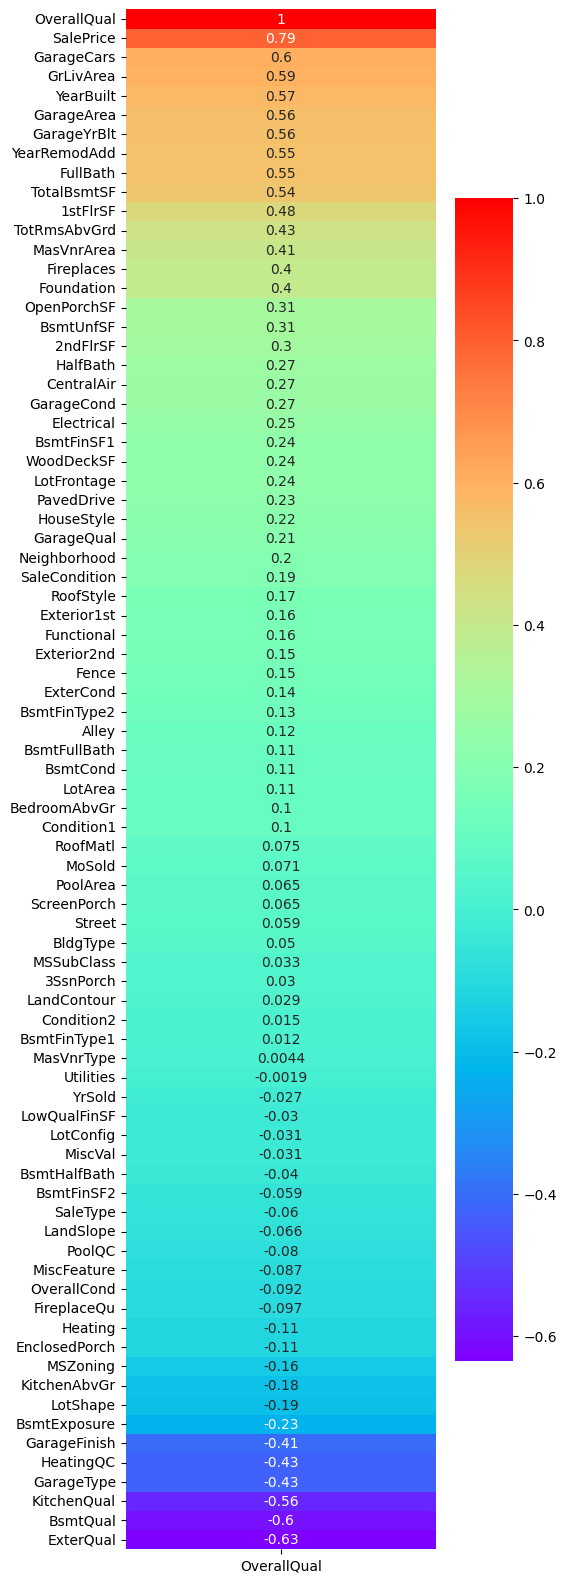

In [33]:
plt.figure(figsize=(5, 20))
plt.show(
    sns.heatmap(
        dataset_corr_full_overallqual.sort_values(by=["OverallQual"], ascending=False),
        annot=True,
        cmap="rainbow",
    )
)


This seems to confirm that there is a correlation between the column for overall quality and the columns "ExterQual", "BsmtQual", "KitchenQual", "GarageType", "HeatingQC" and "GarageFinish".

### Grouping data in categories for visualization

It may be interesting to put some columns in similar categories. For example, columns "GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond" could all be put in a category labeled "garage".

We'll explore that possibility and have a closer look at the data after making these categories.

#### Building the groups in dataframes

In [34]:
# Data regarding the price and the other information we have concerning sale itself
price = ["SalePrice"]
sale_info = ["MiscFeature", "MiscVal", "MoSold", "YrSold", "SaleType", "SaleCondition"]


In [35]:
# Data concerning the lot
lot_details = [
    "Alley",
    "Condition1",
    "Condition2",
    "LandContour",
    "LotArea",
    "LotConfig",
    "LotFrontage",
    "LotShape",
    "MSSubClass",
    "MSZoning",
    "Neighborhood",
    "Street",
    "Utilities",
]


In [36]:
# Data concerning the house itself (size, details about quality, type, materials etc. and the features/utilities that you get with the house)
building_size = ["GrLivArea", "1stFlrSF", "2ndFlrSF", "LowQualFinSF"]
building_details = [
    "BldgType",
    "Exterior1st",
    "Exterior2nd",
    "ExterQual",
    "ExterCond",
    "Foundation",
    "HouseStyle",
    "MasVnrType",
    "MasVnrArea",
    "OverallQual",
    "OverallCond",
    "RoofStyle",
    "RoofMatl",
    "YearBuilt",
    "YearRemodAdd",
]
building_features = [
    "CentralAir",
    "Electrical",
    "Fireplaces",
    "FireplaceQu",
    "Functional",
    "Heating",
    "HeatingQC",
]


In [37]:
# Data concerning dedicated space in the house and its amenities
basement = [
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinSF1",
    "BsmtFinType2",
    "BsmtFinSF2",
    "BsmtQual",
    "BsmtUnfSF",
    "TotalBsmtSF",
]
rooms = [
    "BedroomAbvGr",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "KitchenAbvGr",
    "KitchenQual",
    "TotRmsAbvGrd",
]
garage = [
    "GarageArea",
    "GarageCars",
    "GarageCond",
    "GarageFinish",
    "GarageQual",
    "GarageType",
    "GarageYrBlt",
]


In [38]:
# Data concerning the exterior not including the house/building details
exterior = [
    "EnclosedPorch",
    "Fence",
    "LandSlope",
    "OpenPorchSF",
    "PavedDrive",
    "PoolArea",
    "PoolQC",
    "ScreenPorch",
    "WoodDeckSF",
    "3SsnPorch",
]


#### Comparing lot details with sales data and price

In [39]:
# Dataframe for a correlation between the details of the lot, the info on the sale and the price
dataset_corr = dataset_encoded.loc[:, lot_details + sale_info + price].corr()
dataset_corr_lot = dataset_corr[
    ((dataset_corr >= 0.2) | (dataset_corr <= -0.2)) & (dataset_corr != 1.000)
]


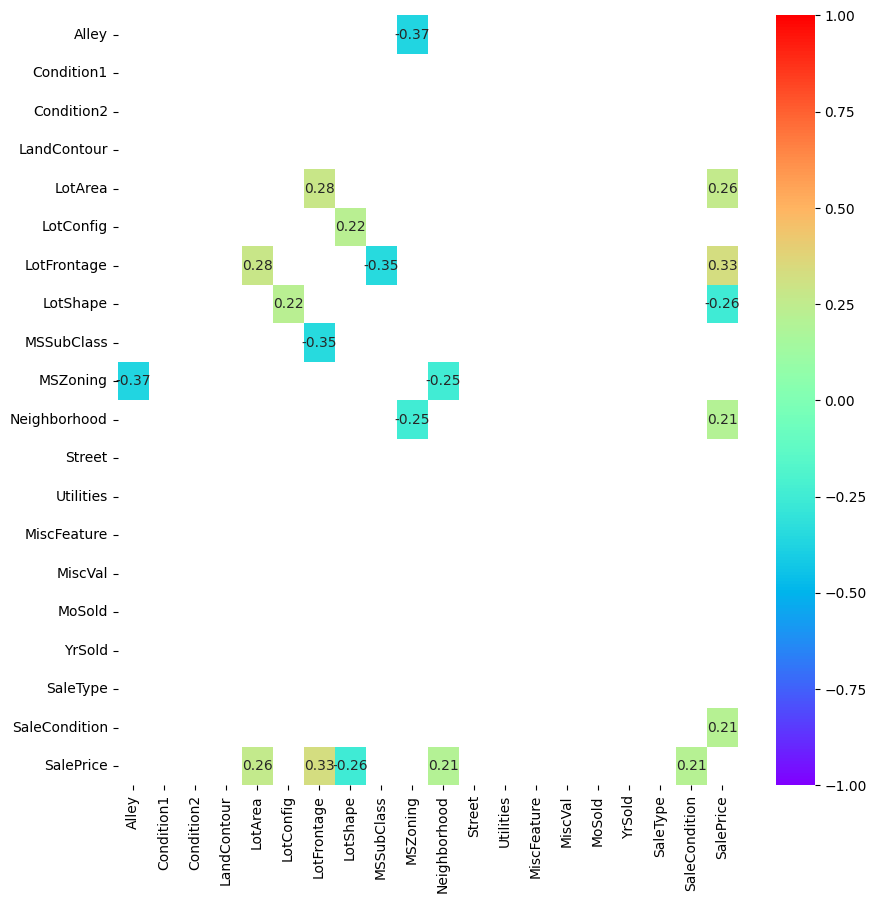

In [40]:
# Correlation Matrix for the lot and the price/sale details
plt.figure(figsize=(10, 10))
plt.show(sns.heatmap(dataset_corr_lot, vmin=-1, vmax=+1, annot=True, cmap="rainbow"))


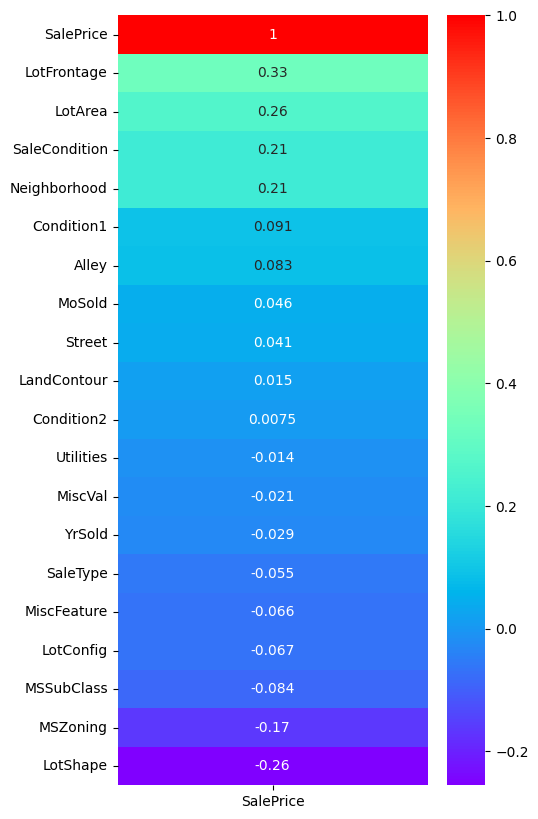

In [41]:
dataset_heatmap_lot = dataset_corr[["SalePrice"]]
plt.figure(figsize=(5, 10))
plt.show(
    sns.heatmap(
        dataset_heatmap_lot.sort_values(by=["SalePrice"], ascending=False),
        cmap="rainbow",
        annot=True,
    )
)


For the lot details and the details of the sales, these categories have above 0.20 or below -0.20 correlation with the column SalePrice:
- LotFrontage
- Lot Area
- SaleCondition
- Neighborhood
- Lot Shape

These columns are considered to have a low impact on the price (correlation btw -0.15 and 0.15):
- Alley
- Street
- Condition1
- Condition2
- MoSold
- YrSold
- SaleType
- LandContour
- LotConfig
- Utilities
- MiscFeature
- MiscVal
- MSSubClass

#### The Why of the Sample

I decided at first in this analysis to exclude data with a correlation in range of -0.20 to 0.20. I did that and will do so throughout the notebook, except when it comes to the heatmaps which will be used to identify the columns with the lowest correlation with the sales price.

To compile a list of columns that we could later exclude since they have a low impact on the price, I will use a correlation range of -0.15 to 0.15. I'm not sure if this is wise or not, but I wanted to play it safe. For example, the column for the neighborhood as a 0.21 correlation with the price and if it was 0.19, I would have skipped it. That's why I decided to lower my range to good old -0.15 to 0.15.

#### The Case of the Neighborhood

I have to admit that I'm a bit surprised that the column "Neighborhood" as a correlation of 0.21 with the "SalePrice" column. We would tend to think that the neighborhood would have an influence, positive or negative, on the price. We will test that theory before continuing our analysis of the other categories.

#### Does the neighborhood have an impact on the price?

Let's have a look at the number of sales per neighborhood.

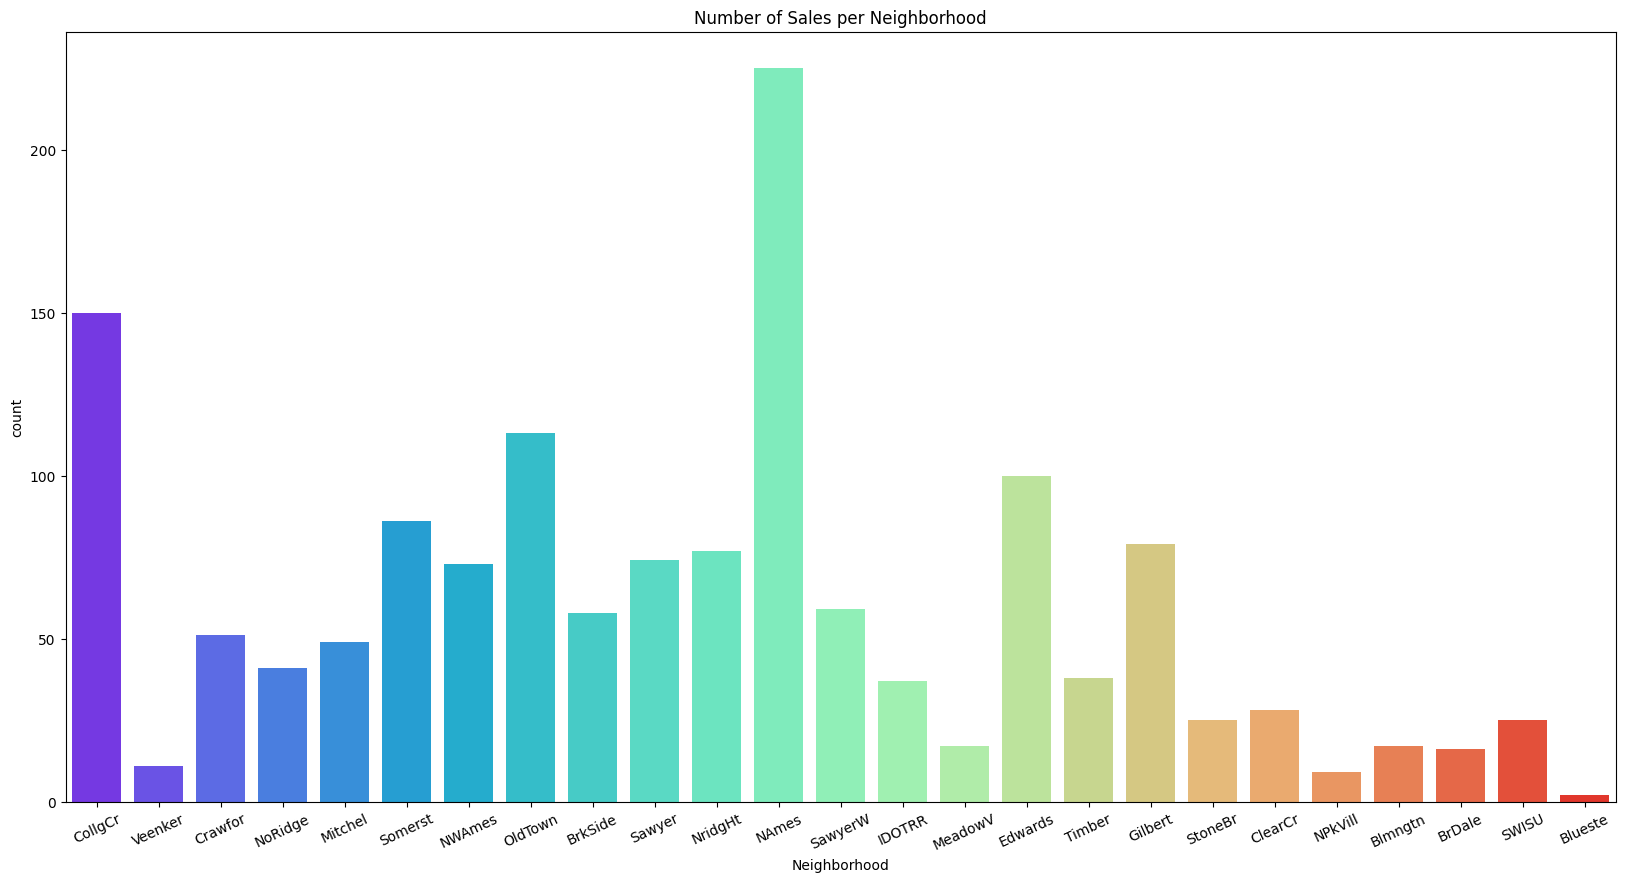

In [42]:
plt.figure(figsize=(20, 10))
plt.title("Number of Sales per Neighborhood")
plt.xticks(rotation=25)
plt.show(
    sns.countplot(
        data=dataset.loc[:, lot_details + sale_info + price],
        x="Neighborhood",
        palette="rainbow",
    )
)


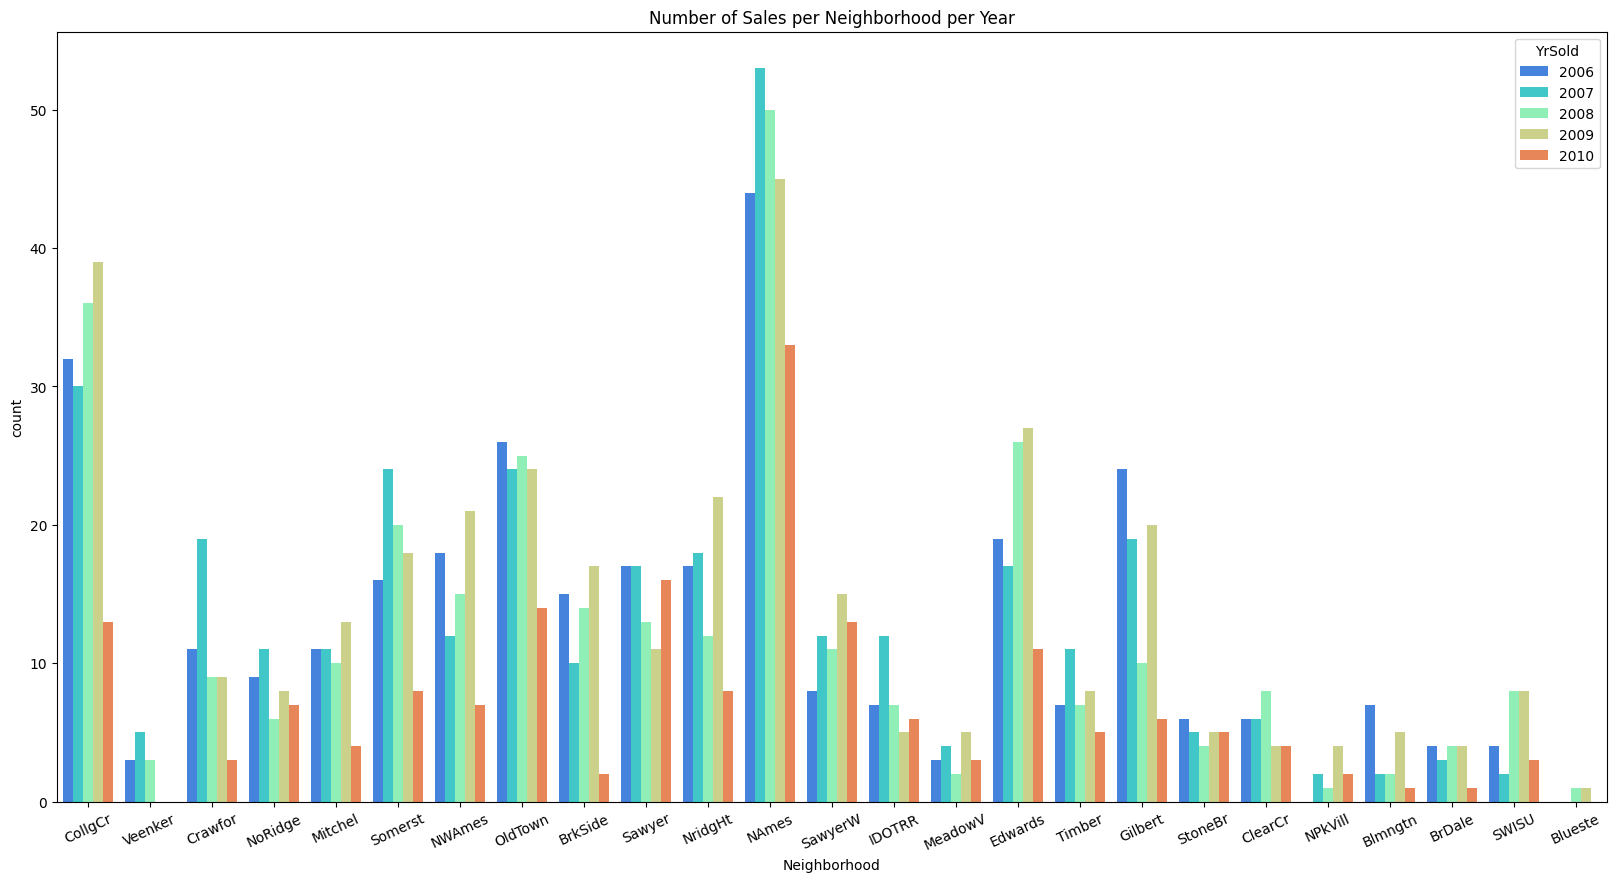

In [43]:
plt.figure(figsize=(20, 10))
plt.title("Number of Sales per Neighborhood per Year")
plt.xticks(rotation=25)
plt.show(
    sns.countplot(
        data=dataset.loc[:, lot_details + sale_info + price],
        x="Neighborhood",
        hue="YrSold",
        palette="rainbow",
    )
)


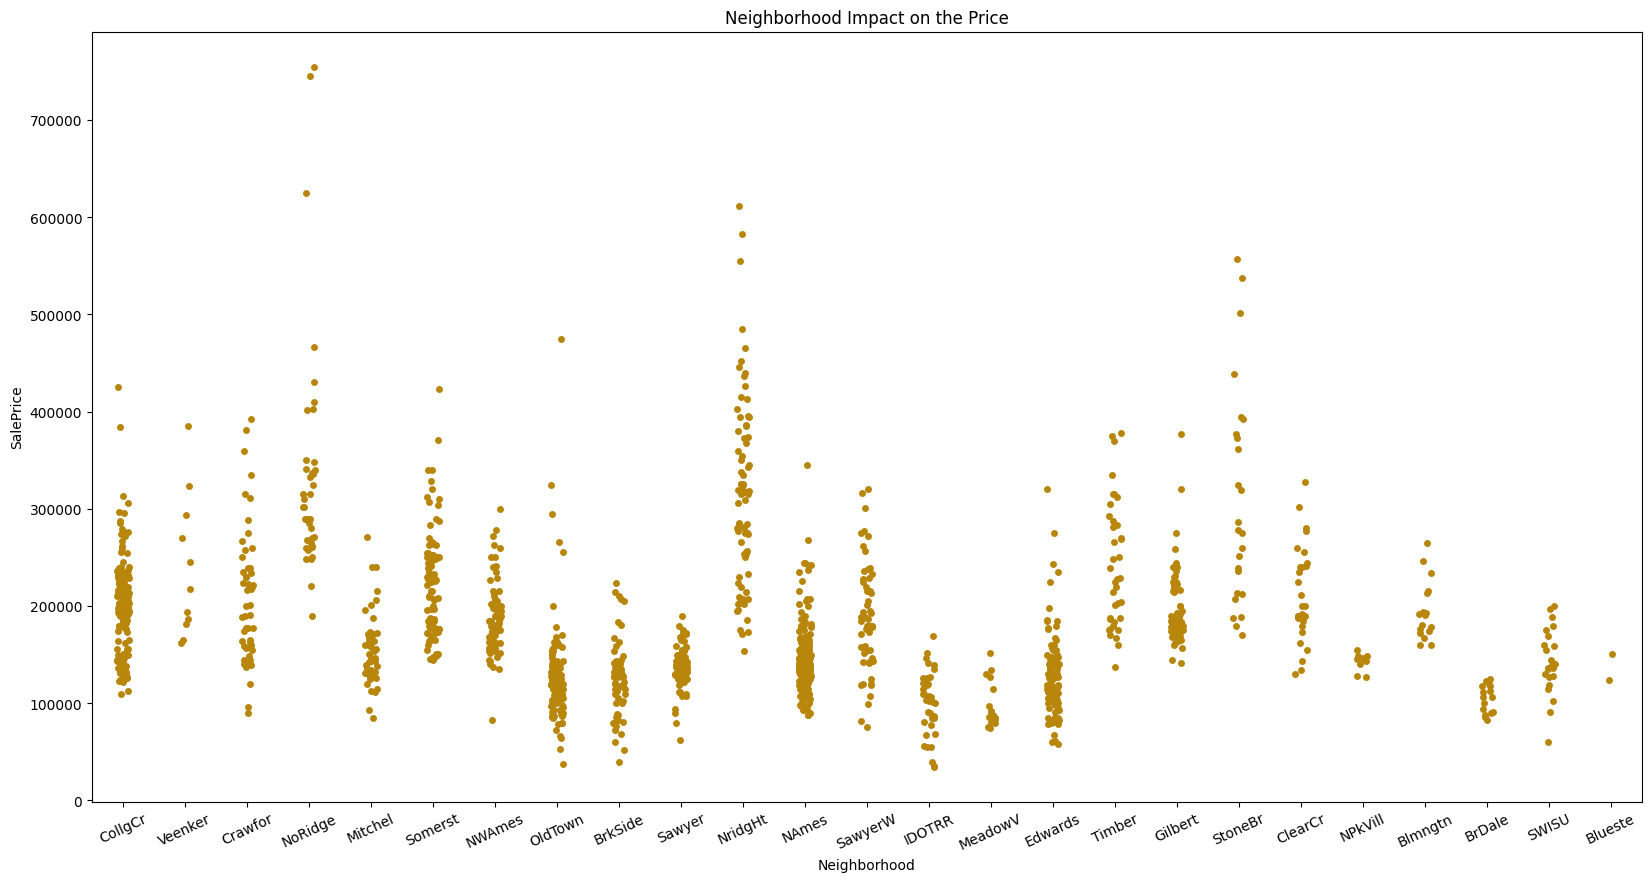

In [44]:
plt.figure(figsize=(20, 10))
plt.title("Neighborhood Impact on the Price")
plt.xticks(rotation=25)
sns.stripplot(
    data=dataset.loc[:, lot_details + sale_info + price],
    x="Neighborhood",
    y="SalePrice",
    color="darkgoldenrod",
)
plt.show()


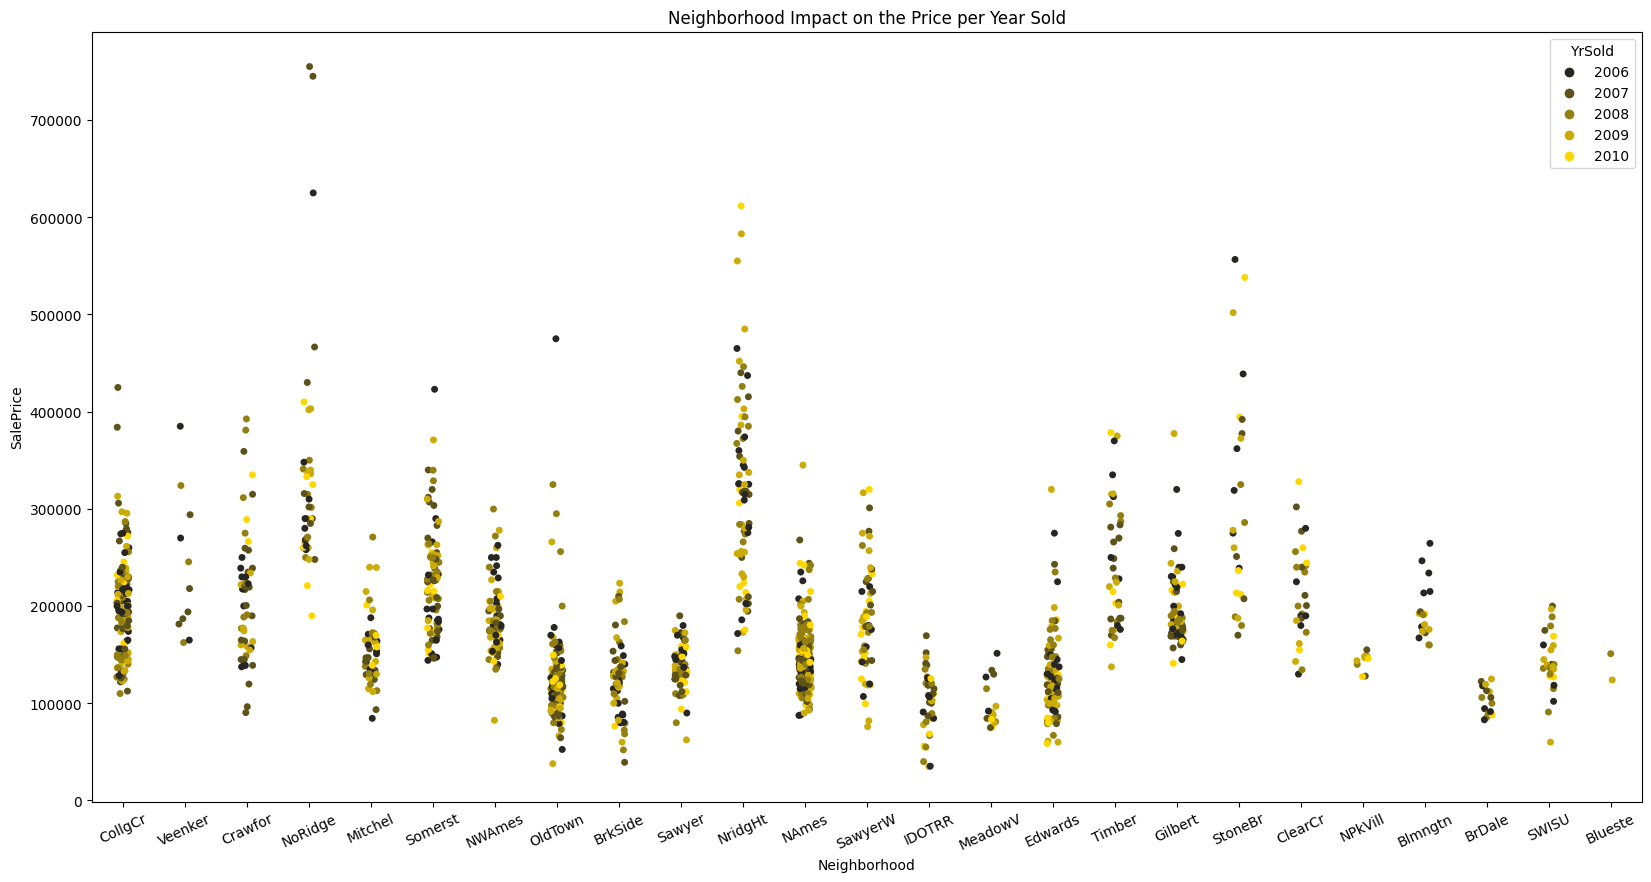

In [45]:
plt.figure(figsize=(20, 10))
plt.title("Neighborhood Impact on the Price per Year Sold")
plt.xticks(rotation=25)
sns.stripplot(
    data=dataset.loc[:, lot_details + sale_info + price],
    x="Neighborhood",
    y="SalePrice",
    hue="YrSold",
    palette="dark:Gold",
)
plt.show()


 These tend to confirm the theory that the neighborhood has an impact on the price. In each neighborhoob, the dots are grouped except for a few outliers. So this seems to show that the price of a house could be linked to the neighborhood it is in.

 Let's get a look at the mean and median values for the sales price per neighborhood !

In [46]:
dataset_neighborhood_1 = (
    dataset[["Neighborhood", "SalePrice"]]
    .groupby(["Neighborhood"])
    .mean()
    .sort_values(by="SalePrice", ascending=False)
)
dataset_neighborhood_1.head(25)


,SalePrice
Neighborhood,
NoRidge,335295.317073
NridgHt,316270.623377
StoneBr,310499.000000
Timber,242247.447368
Veenker,238772.727273
Somerst,225379.837209
ClearCr,212565.428571
Crawfor,210624.725490
CollgCr,197965.773333


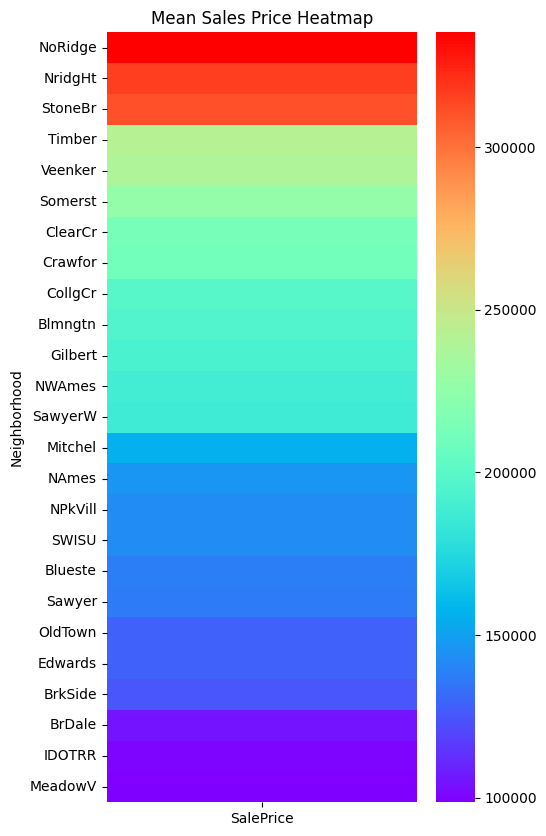

In [47]:
plt.figure(figsize=(5, 10))
plt.title("Mean Sales Price Heatmap")
plt.show(
    sns.heatmap(
        dataset_neighborhood_1.sort_values(by=["SalePrice"], ascending=False),
        cmap="rainbow",
        annot=False,
    )
)


In [48]:
dataset_neighborhood_2 = (
    dataset[["Neighborhood", "SalePrice"]]
    .groupby(["Neighborhood"])
    .median()
    .sort_values(by="SalePrice", ascending=True)
)
dataset_neighborhood_2.head(25)


,SalePrice
Neighborhood,
MeadowV,88000.0
IDOTRR,103000.0
BrDale,106000.0
OldTown,119000.0
Edwards,121750.0
BrkSide,124300.0
Sawyer,135000.0
Blueste,137500.0
SWISU,139500.0


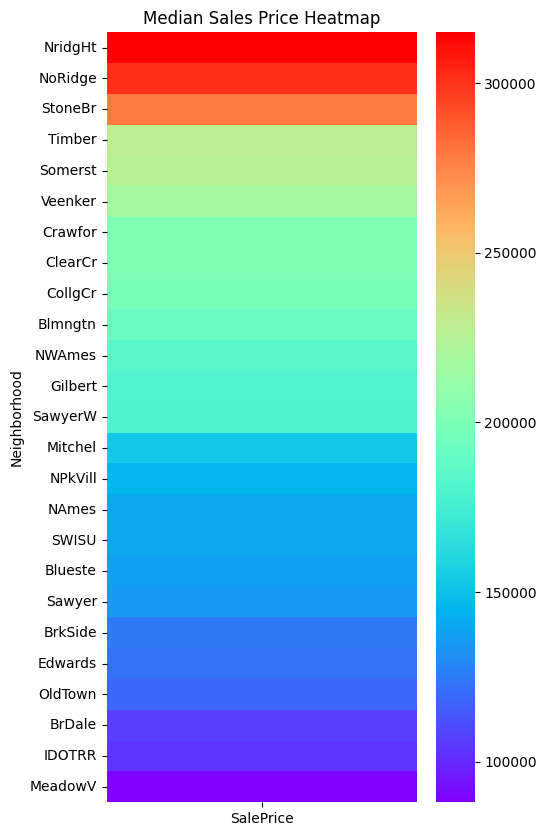

In [49]:
plt.figure(figsize=(5, 10))
plt.title("Median Sales Price Heatmap")
plt.show(
    sns.heatmap(
        dataset_neighborhood_2.sort_values(by=["SalePrice"], ascending=False),
        cmap="rainbow",
        annot=False,
    )
)


There is a real discrepancy between the highest and lowest neighborhoods in term of mean and median amount of dollars required to purchase a house.  This confirms that the neighborhood indeed has an impact on the sales price.

#### The case of the Month and Year

Although MoSold and YrSold have a low correlation with SalePrice, I'm curious to test if there is a link between these elements and the sales price.

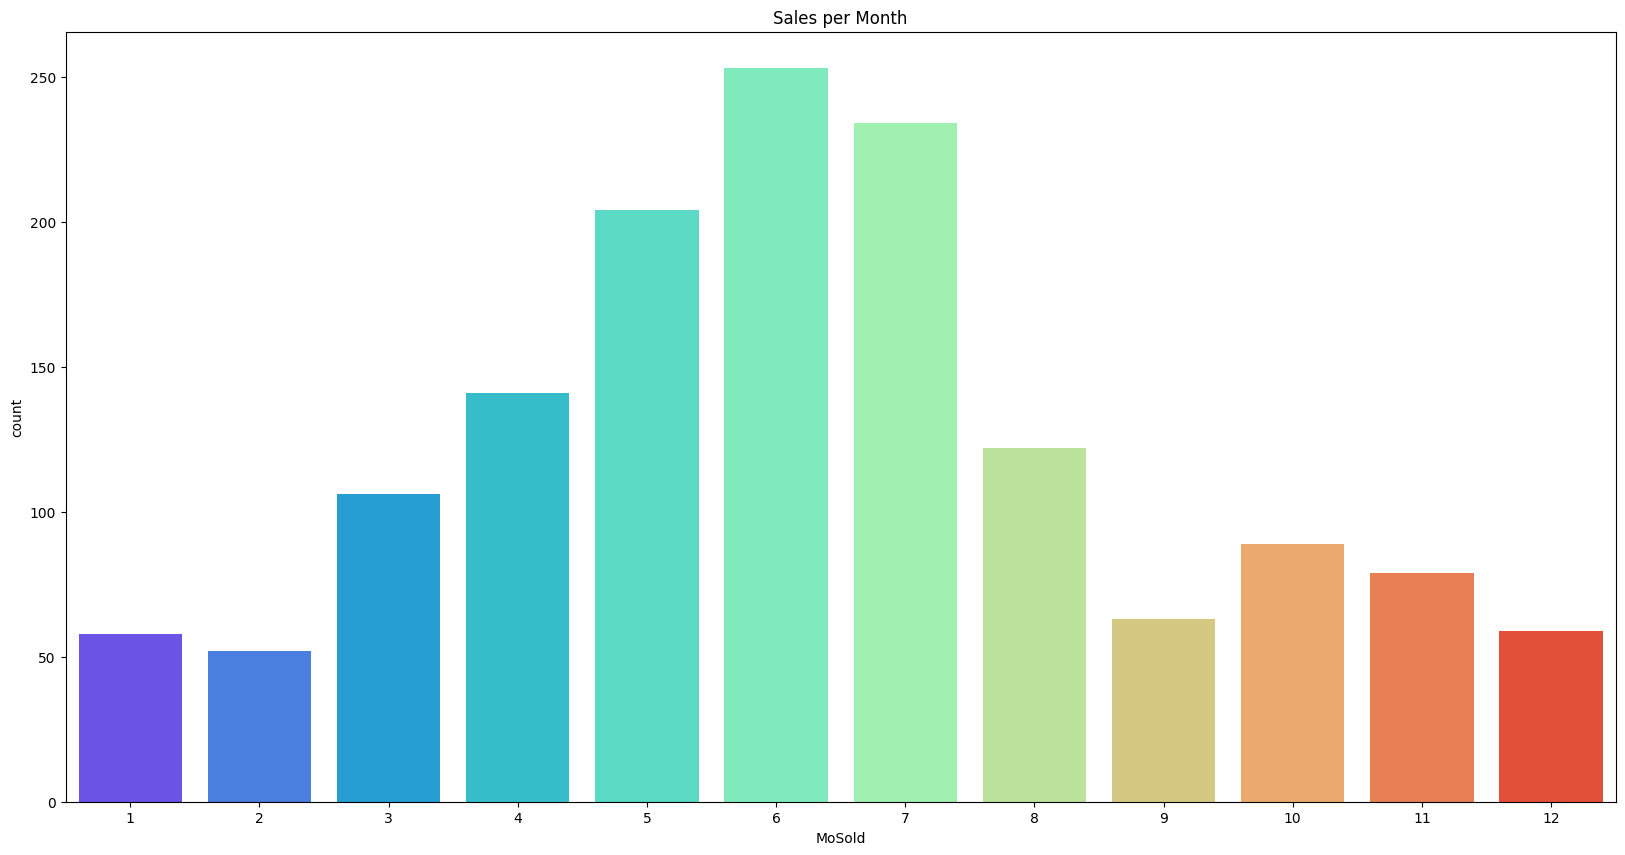

In [50]:
plt.figure(figsize=(20, 10))
plt.title("Sales per Month")
plt.show(
    sns.countplot(
        data=dataset.loc[:, lot_details + sale_info + price],
        x="MoSold",
        palette="rainbow",
    )
)


Sales appear to happen most around May - June - July, which is not that shocking. Pretty much what I expected.

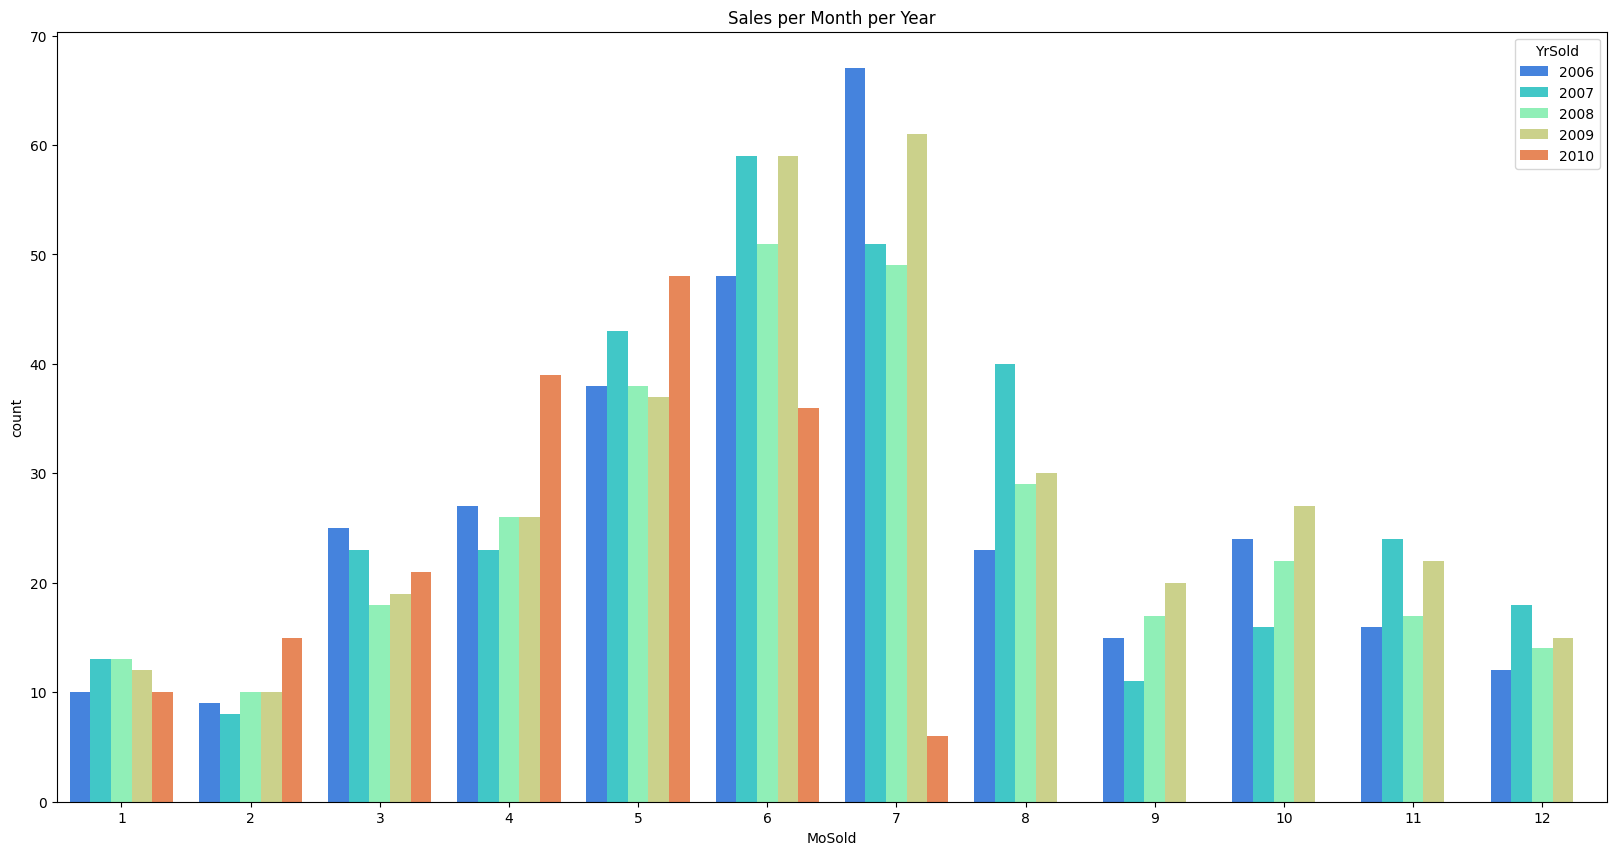

In [51]:
plt.figure(figsize=(20, 10))
plt.title("Sales per Month per Year")
plt.show(
    sns.countplot(
        data=dataset.loc[:, lot_details + sale_info + price],
        x="MoSold",
        hue="YrSold",
        palette="rainbow",
    )
)


Adding the year does change the repartition, except that we seem to be missing the data for 2010 from June/July and the rest of the year. 

That could be explained by the date when this dataset was first compiled.

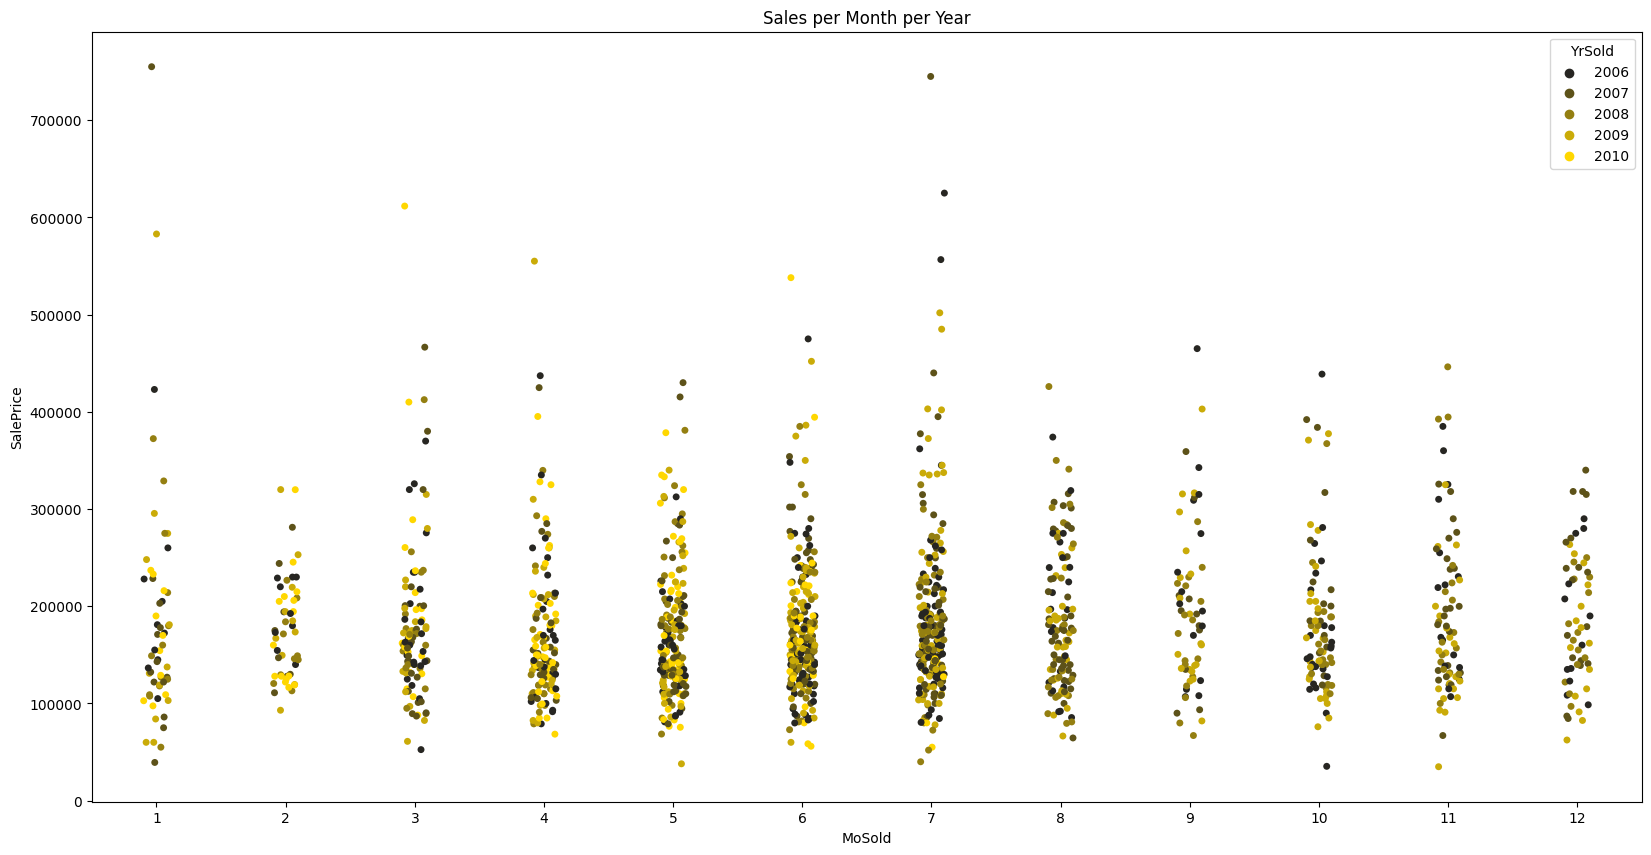

In [52]:
plt.figure(figsize=(20, 10))
plt.title("Sales per Month per Year")
sns.stripplot(
    data=dataset.loc[:, lot_details + sale_info + price],
    x="MoSold",
    y="SalePrice",
    hue="YrSold",
    palette="dark:Gold",
)
plt.show()


Confirmed : the month and year do not have an impact on the sales price.

However, the years we have here are between 2006 and 2010. It seems logical that on a short time frame prices do not rise that much. It would be another story if we had data from 1950 to today.

-----------------


Now, let's get back on track and let's compare the rest of the categories. Shall we?

Yes we shall, my precious. Yes - we - shall.

#### Comparing building data with price

FYI : please find below the categories that we made earlier. Just in case you forgot when you went to brew a pot of coffee.

In [53]:
"""Data concerning the house itself 
(size, details about quality, type, materials etc. and the features/utilities that you get with the house)

building_size = ["GrLivArea", "1stFlrSF", "2ndFlrSF", "LowQualFinSF"]
building_details = [
    "BldgType",
    "Exterior1st",
    "Exterior2nd",
    "ExterQual",
    "ExterCond",
    "Foundation",
    "HouseStyle",
    "MasVnrType",
    "MasVnrArea",
    "OverallQual",
    "OverallCond",
    "RoofStyle",
    "RoofMatl",
    "YearBuilt",
    "YearRemodAdd",
]
building_features = [
    "CentralAir",
    "Electrical",
    "Fireplaces",
    "FireplaceQu",
    "Functional",
    "Heating",
    "HeatingQC",
]

"""


'Data concerning the house itself \n(size, details about quality, type, materials etc. and the features/utilities that you get with the house)\n\nbuilding_size = ["GrLivArea", "1stFlrSF", "2ndFlrSF", "LowQualFinSF"]\nbuilding_details = [\n    "BldgType",\n    "Exterior1st",\n    "Exterior2nd",\n    "ExterQual",\n    "ExterCond",\n    "Foundation",\n    "HouseStyle",\n    "MasVnrType",\n    "MasVnrArea",\n    "OverallQual",\n    "OverallCond",\n    "RoofStyle",\n    "RoofMatl",\n    "YearBuilt",\n    "YearRemodAdd",\n]\nbuilding_features = [\n    "CentralAir",\n    "Electrical",\n    "Fireplaces",\n    "FireplaceQu",\n    "Functional",\n    "Heating",\n    "HeatingQC",\n]\n\n'

We will have a look at the correlations between these categories, plus the ones that we haven't studied yet, and the "SalePrice" to see if there is a correlation. The idea being at the end of this comparison to have a list of columns that we should keep and one that we could squish for the machine learning prediction.

In [54]:
# Dataframe for a correlation between the building size and building features categories and the price
dataset_corr = dataset_encoded.loc[:, building_size + building_features + price].corr()
dataset_corr_building1 = dataset_corr[
    ((dataset_corr >= 0.2) | (dataset_corr <= -0.2)) & (dataset_corr != 1.000)
]


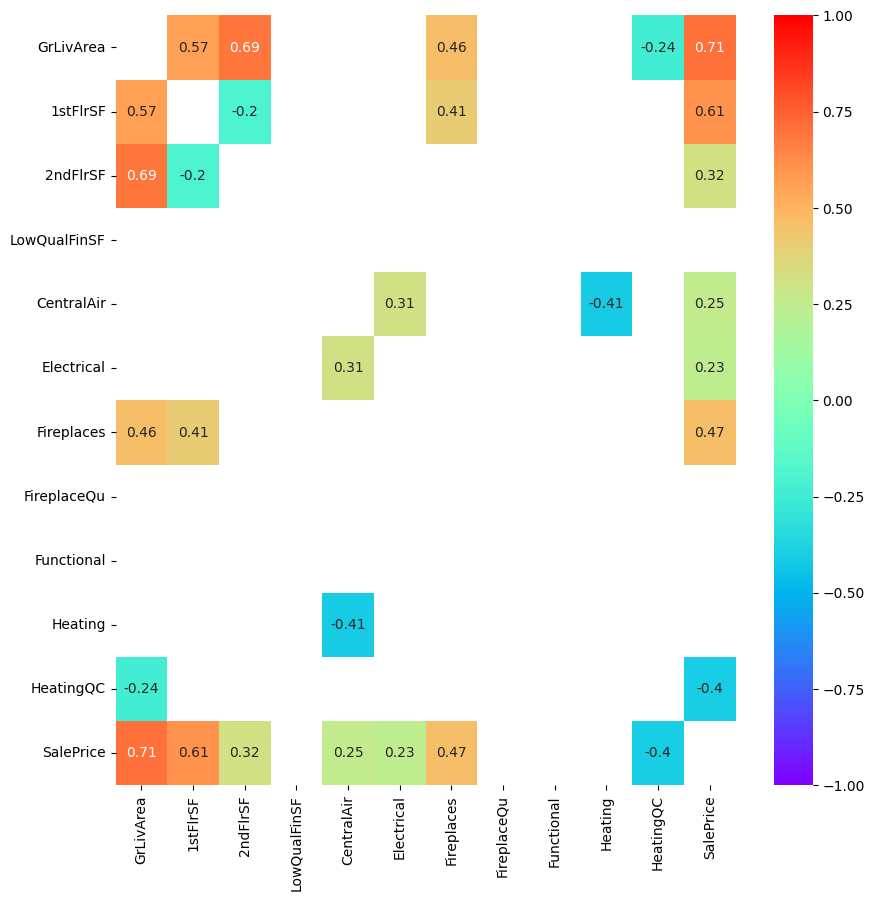

In [55]:
# Correlation Matrix for the building size and building features categories and the price
plt.figure(figsize=(10, 10))
plt.show(
    sns.heatmap(dataset_corr_building1, vmin=-1, vmax=+1, annot=True, cmap="rainbow")
)


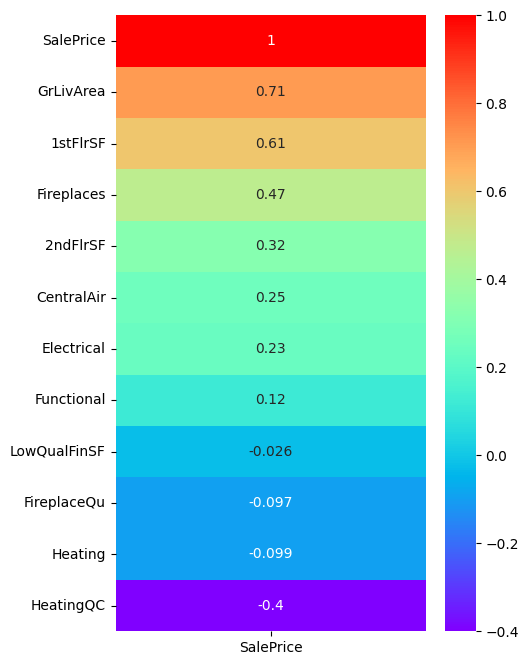

In [56]:
dataset_heatmap_building1 = dataset_corr[["SalePrice"]]
plt.figure(figsize=(5, 8))
plt.show(
    sns.heatmap(
        dataset_heatmap_building1.sort_values(by=["SalePrice"], ascending=False),
        cmap="rainbow",
        annot=True,
    )
)


These columns are considered to have a low impact on the price (correlation btw -0.15 and 0.15):
- Functional
- LowQualFinSF
- FireplaceQu
- Heating

In [57]:
# Dataframe for a correlation between the building details and the price
dataset_corr = dataset_encoded.loc[:, building_details + price].corr()
dataset_corr_building2 = dataset_corr[
    ((dataset_corr >= 0.2) | (dataset_corr <= -0.2)) & (dataset_corr != 1.000)
]


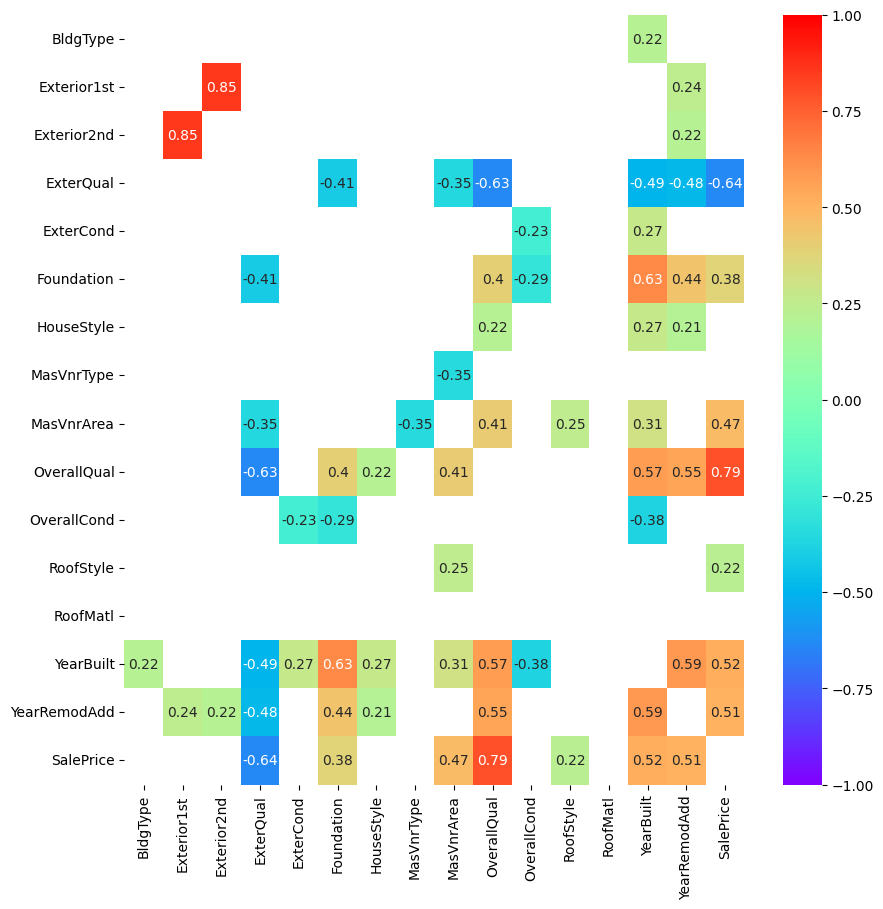

In [58]:
# Correlation Matrix for the building details and the price
plt.figure(figsize=(10, 10))
plt.show(
    sns.heatmap(dataset_corr_building2, vmin=-1, vmax=+1, annot=True, cmap="rainbow")
)


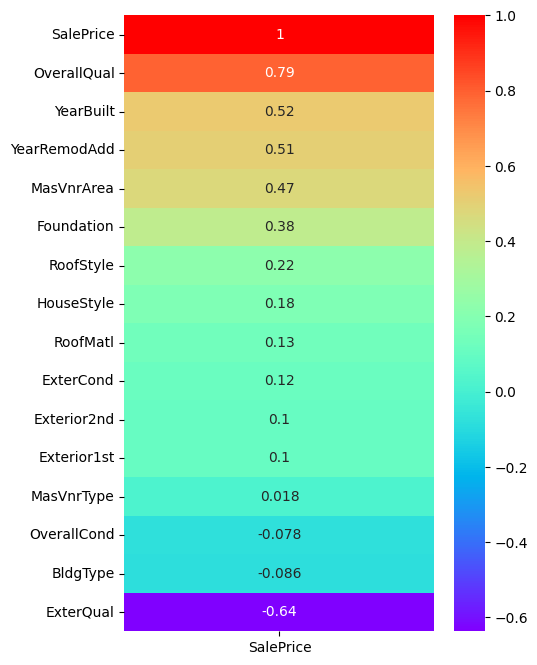

In [59]:
# Correlation heatmap for the building details and the price
dataset_heatmap_building2 = dataset_corr[["SalePrice"]]
plt.figure(figsize=(5, 8))
plt.show(
    sns.heatmap(
        dataset_heatmap_building2.sort_values(by=["SalePrice"], ascending=False),
        cmap="rainbow",
        annot=True,
    )
)


These columns are considered to have a low impact on the price (correlation btw -0.15 and 0.15):
- RoofMatl
- ExterCond
- Exterior2nd
- Exterior1st
- MasVnrType
- OverallCond
- BldgType

In [60]:
"""
Data concerning dedicated space in the house and its amenities
basement = [
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinSF1",
    "BsmtFinType2",
    "BsmtFinSF2",
    "BsmtQual",
    "BsmtUnfSF",
    "TotalBsmtSF",
]
rooms = [
    "BedroomAbvGr",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "KitchenAbvGr",
    "KitchenQual",
    "TotRmsAbvGrd",
]
garage = [
    "GarageArea",
    "GarageCars",
    "GarageCond",
    "GarageFinish",
    "GarageQual",
    "GarageType",
    "GarageYrBlt",
]

"""


'\nData concerning dedicated space in the house and its amenities\nbasement = [\n    "BsmtCond",\n    "BsmtExposure",\n    "BsmtFinType1",\n    "BsmtFinSF1",\n    "BsmtFinType2",\n    "BsmtFinSF2",\n    "BsmtQual",\n    "BsmtUnfSF",\n    "TotalBsmtSF",\n]\nrooms = [\n    "BedroomAbvGr",\n    "BsmtFullBath",\n    "BsmtHalfBath",\n    "FullBath",\n    "HalfBath",\n    "KitchenAbvGr",\n    "KitchenQual",\n    "TotRmsAbvGrd",\n]\ngarage = [\n    "GarageArea",\n    "GarageCars",\n    "GarageCond",\n    "GarageFinish",\n    "GarageQual",\n    "GarageType",\n    "GarageYrBlt",\n]\n\n'

In [61]:
# Dataframe for a correlation between the basement, the rooms and the price
dataset_corr = dataset_encoded.loc[:, basement + rooms + price].corr()
dataset_corr_interior = dataset_corr[
    ((dataset_corr >= 0.2) | (dataset_corr <= -0.2)) & (dataset_corr != 1.000)
]


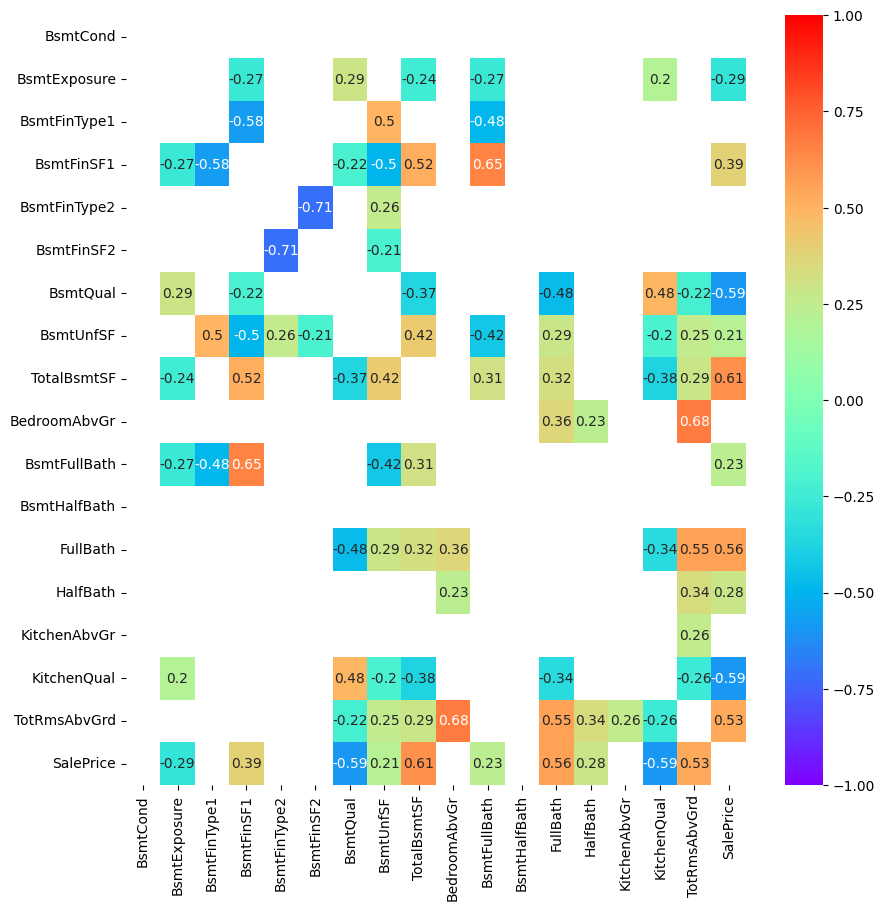

In [62]:
# Correlation Matrix for the basement, the rooms and the price
plt.figure(figsize=(10, 10))
plt.show(
    sns.heatmap(dataset_corr_interior, vmin=-1, vmax=+1, annot=True, cmap="rainbow")
)


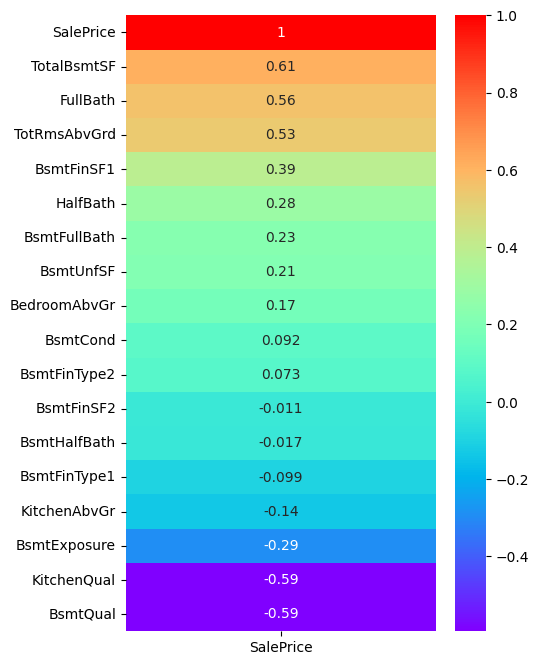

In [63]:
# Correlation heatmap for the basement, the rooms and the price
dataset_heatmap_interior = dataset_corr[["SalePrice"]]
plt.figure(figsize=(5, 8))
plt.show(
    sns.heatmap(
        dataset_heatmap_interior.sort_values(by=["SalePrice"], ascending=False),
        cmap="rainbow",
        annot=True,
    )
)


These columns are considered to have a low impact on the price (correlation btw -0.15 and 0.15):
- BsmtCond
- BsmtFinType2
- BsmtFinSF2
- BsmtHalfBath
- BsmtFinType1
- KitchenAbvGr

Well most of these are details of the basement...

In [64]:
# Dataframe for a correlation between the garage, the exterior and the price
dataset_corr = dataset_encoded.loc[:, garage + exterior + price].corr()
dataset_corr_exterior = dataset_corr[
    ((dataset_corr >= 0.2) | (dataset_corr <= -0.2)) & (dataset_corr != 1.000)
]


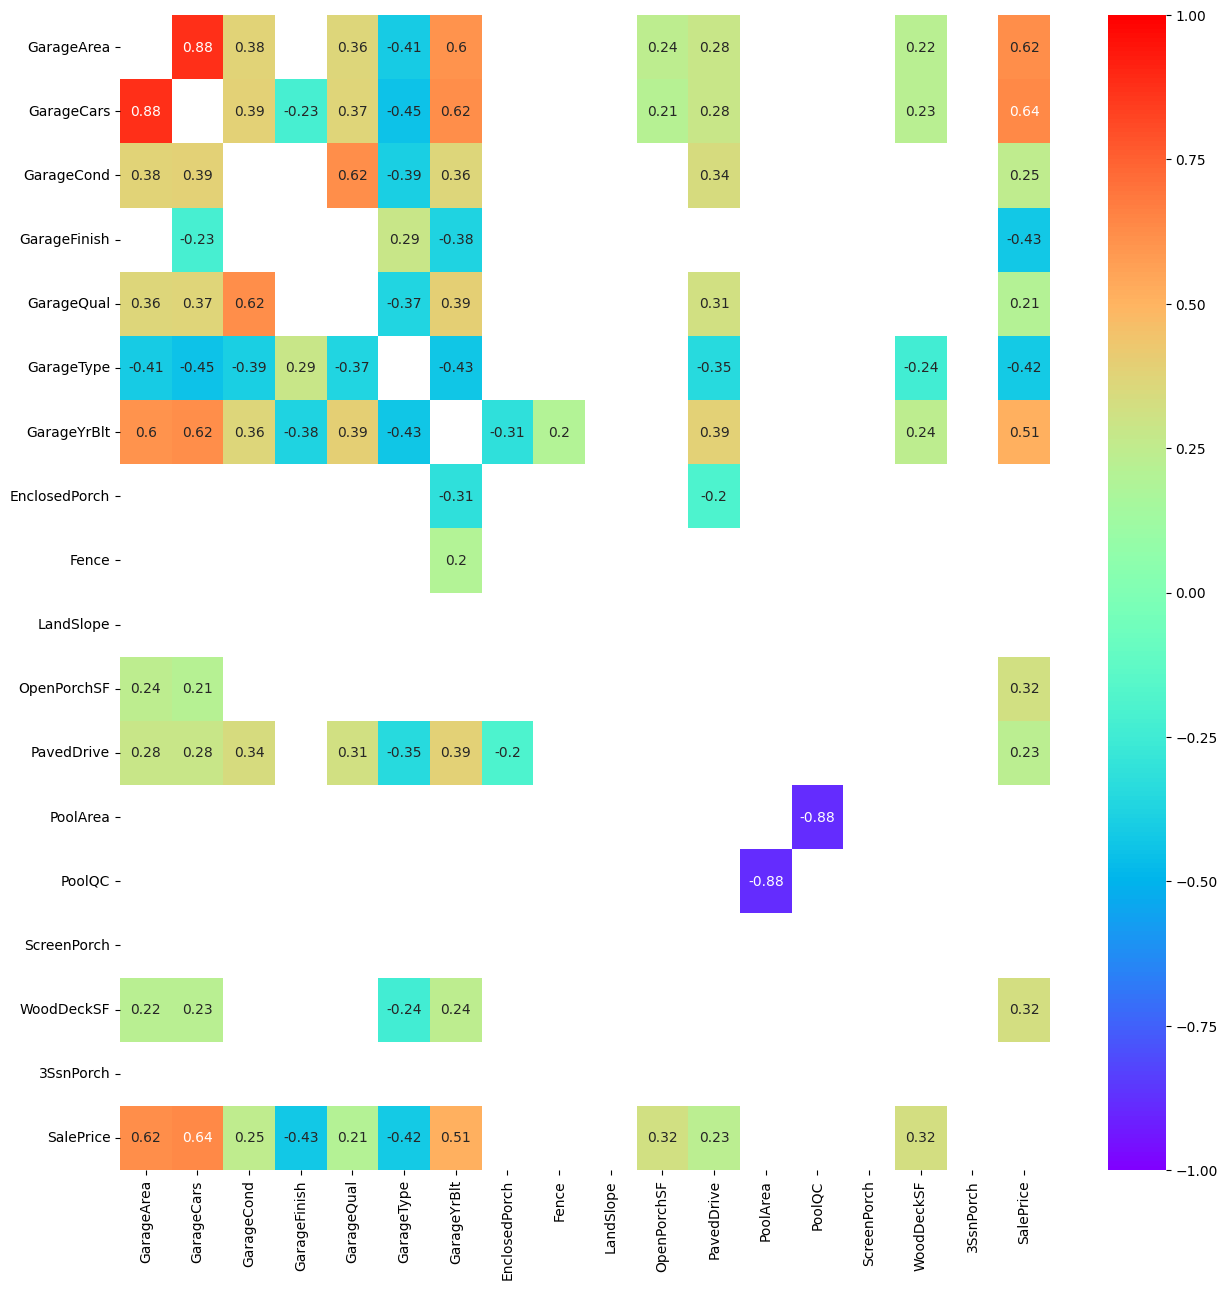

In [65]:
# Correlation Matrix for the garage, the exterior and the price
plt.figure(figsize=(15, 15))
plt.show(
    sns.heatmap(dataset_corr_exterior, vmin=-1, vmax=+1, annot=True, cmap="rainbow")
)


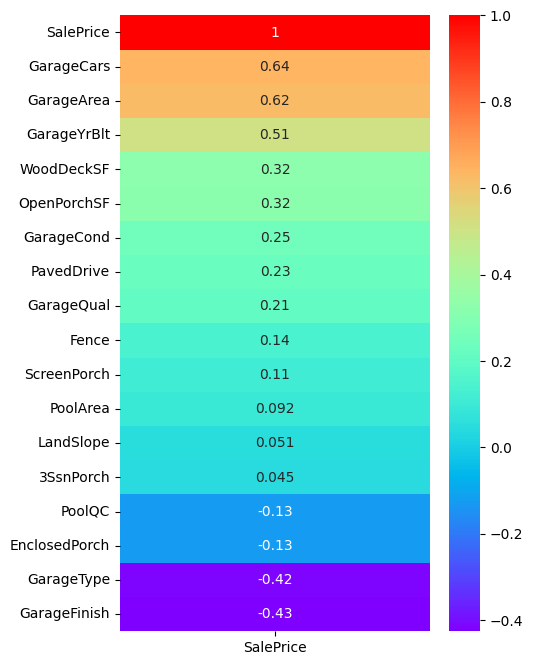

In [66]:
# Correlation heatmap for the garage, the exterior and the price
dataset_heatmap_exterior = dataset_corr[["SalePrice"]]
plt.figure(figsize=(5, 8))
plt.show(
    sns.heatmap(
        dataset_heatmap_exterior.sort_values(by=["SalePrice"], ascending=False),
        cmap="rainbow",
        annot=True,
    )
)


Well let's recap what we have seen with all these correlations: a lot of columns have a correlation with the sales price that is between -0.20 and 0.20. This could mean that these column have a low impact on the price itself. Those closest to 0 could be considered as having no impact.

Thus, here is a complete list of the columns that are considered to have a low impact on the price (correlation btw -0.15 and 0.15):

- Alley
- Street
- Condition1
- Condition2
- MoSold
- YrSold
- SaleType
- LandContour
- LotConfig
- Utilities
- MiscFeature
- MiscVal
- MSSubClass
- MSZoning
- 3SsnPorch 
- EnclosedPorch
- Fence
- LandSlope
- PoolArea
- PoolQC
- ScreenPorch
- Functional
- LowQualFinSF
- FireplaceQu
- Heating
- RoofMatl
- ExterCond
- Exterior2nd
- Exterior1st
- MasVnrType
- OverallCond
- BldgType
- BsmtCond
- BsmtFinType2
- BsmtFinSF2
- BsmtHalfBath
- BsmtFinType1
- KitchenAbvGr

### End of analysis

- For the machine learning prediction : it might be interesting for the machine learning prediction to start using all columns in an almost clean/untouched dataframe - well except for missing values - and then later use another dataframe which excludes all the columns with low impact that we identified before that.
- For futher data analysis : it could be interesting to explore more hypothesis and test more theories on this dataset. But truth be told, I'm running out of time.